# **Análise de Dados de Vinhos no Brasil  de 2008 a 2022 - Tech Challenge - Fase 1 - Pos Tech - Data Analytics - FIAP**

# 1. Introdução

Este projeto faz parte do projeto Tech Challenge da Pos Tech Data Analytics FIAP e conta como nota da primeira fase da pós graduação.
O grupo que desenvolveu esse projeto é composto por:

Aelton Pereira de Lacerda

André Martins Pontes

Arthur do Nascimento Siqueira

Matheus Martins Matias Rodrigues

Victor Campanha Barros 

# 2. Visão Geral 

O problema da previsibilidade de cenários futuros é uma preocupação significativa para empresas de produção e exportação de vinhos. Mudanças inesperadas no mercado internacional de compra e venda podem levar à perda de mercado e até a prejuízos enormes se a empresa não acompanhar essas alterações. Nesse sentido, a análise de dados, tanto da empresa quanto do cenário mundial, torna-se uma ferramenta indispensável para auxiliar na tomada de decisão. Essa prática oferece uma vantagem competitiva frente às concorrentes que não utilizam essa ferramenta, permitindo uma adaptação mais rápida e eficaz às mudanças de mercado.

Este projeto tem como objetivo analisar o montante de vendas de exportação de vinhos provenientes do Brasil nos últimos 15 anos. Utilizamos a linguagem de programação Python, através da biblioteca Pandas, para a extração, limpeza, tratamento e carregamento dos dados. Para a visualização dos dados, utilizamos a biblioteca Matplotlib e Seaborn alem do software Power BI, criando graficos para facilitar a análise. A partir disso, sugerimos possíveis ações para melhorias nas exportações com base nos dados analisados.

# 3. Business Understanding

No cenário atual de globalização e competitividade no mercado de vinhos, compreender os padrões de exportação é fundamental para as empresas do setor. Com o aumento do comércio internacional e a diversificação dos gostos dos consumidores, entender as tendências de exportação de vinhos torna-se crucial para desenvolver estratégias de negócios eficazes.

A análise dos dados de exportação de vinhos do Brasil ao longo dos últimos 15 anos oferece uma visão detalhada das mudanças no mercado global, permitindo que as empresas identifiquem padrões, sazonalidades e preferências dos consumidores em diferentes regiões do mundo. Essa compreensão é essencial para a tomada de decisões informadas em relação à produção, marketing e distribuição dos produtos, visando maximizar as oportunidades de negócio e minimizar os riscos associados às flutuações do mercado.

**Tipos de Análise Realizados:**
- Análise exploratoria dos dados de exportação,importação, produção e comercialização
- Análise das tendências de mercado 
- Analise do cenario mundial de vinhos

**Principais Indicadores Chave de Desempenho:**
- Quantidade em litros de vinho exportado(1Kg = 1L)
- Valor exportado (US\$)
- Valor por litro exportado(US\$)
- Quantidade em litros de vinho importado(1Kg = 1L)
- Valor Importado (US\$)
- Valor por litro importado(US$)
- Quantidade em litros de vinho produzido(1L)
- Quantidade em litros de vinho comercializado(1L)


# 4. Importando os pacotes e datasets necessários

In [1]:
# Bibliotecas padrão
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import requests
from sklearn.preprocessing import MinMaxScaler

import warnings

# Desabilitar todos os warnings
warnings.filterwarnings("ignore")

In [2]:
# importando a base de dados de Importação 
importacao = pd.read_csv('https://github.com/victorcbarros/Analise-Exportacao-de-Vinhos/raw/main/data-dados/raw-iniciais/ImpVinhos.csv',sep=';',encoding="UTF-8-SIG",thousands=".",decimal=",")

In [3]:
# importando a base de dados de Exportação 
exportacao = pd.read_csv('https://github.com/victorcbarros/Analise-Exportacao-de-Vinhos/raw/main/data-dados/raw-iniciais/ExpVinho.csv',
                         sep=';',encoding='UTF-8-SIG',decimal=',')

In [4]:
# importando a base de dados de produção 
producao = pd.read_csv("https://github.com/victorcbarros/Analise-Exportacao-de-Vinhos/raw/main/data-dados/raw-iniciais/Producao.csv",
                        encoding="UTF-8-SIG",sep=";",thousands=".",decimal=",")

In [5]:
# importando a base de dados de comercio
comercio = pd.read_csv("https://github.com/victorcbarros/Analise-Exportacao-de-Vinhos/raw/main/data-dados/raw-iniciais/Comercio.csv",
                  encoding="UTF-8-SIG",sep=";",thousands=".",decimal=",")

In [6]:
# importando a base de dados de mercado
mercado = pd.read_excel('https://github.com/victorcbarros/Analise-Exportacao-de-Vinhos/raw/main/data-dados/raw-iniciais/dadosvinhos.xlsx')

In [7]:
# importando a base de dados de população
# extraindo a url
url = 'https://pt.wikipedia.org/wiki/Lista_de_pa%C3%ADses_por_popula%C3%A7%C3%A3o'

# Fazendo a requisição usando requests
response = requests.get(url)

# Verifica se a requisição foi bem sucedida
if response.status_code == 200:
    # Lendo o HTML para um DataFrame
    populacao = pd.read_html(response.text)[0]
    populacao.head()
else:
    print("Falha ao acessar o site. Status code:", response.status_code)

#  5. Tratamendo e Limpeza dos dados

Esta seção fornece uma visão sobre o tratamento e limpeza feita nos dados que estão sendo analisados.

## 5.1 Produção e Comercialização

<span style="font-size: 20px;">**Dicionário de Variáveis**</span>


<span style="font-size: 18px;">**Produção**</span>

- **`Produto`**: 
  - **Descrição:** Vinho do Rio Grande do Sul
  - **Finalidade:** Definir o tipo do Vinho
  
- **`Quantidade(L.)`**: 
  - **Descrição:** Quantidade em Litros produzido
  - **Finalidade:** Quantificar o volume de produção por ano

<span style="font-size: 18px;">**Comercialização**</span>

- **`Produto`**: 
  - **Descrição:** Vinho do Rio Grande do Sul
  - **Finalidade:** Definir o tipo do Vinho
  
- **`Quantidade(L.)`**: 
  - **Descrição:** Quantidade em Litros comercializado
  - **Finalidade:** Quantificar o volume comercializado por ano





#### 5.1.1 Tratamendo e Limpeza dos dados de Produção e Comercialização

Os dados de Produção e Comercialização estão ambos em duas tabelas diferentes, o intuito inicial é juntar as duas tabelas em uma só, para isso vamos analisar e fazer todo procedimento de tratamento e limpeza das duas tabelas. O primeiro passo é observar como os dados estão organizados

In [8]:
# Ver as cinco primeiras entradas da base de produção 
producao.head()

,id,produto,1970,1971,1972,1973,1974,1975,1976,1977,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,1,VINHO DE MESA,217208604,154264651,146953297,116710345,193875345,177401209,144565438,195359778,...,196904222,196173123,210308560,86319015,255015187,218375636,144629737,124200414,173899995,195031611
1,2,Tinto,174224052,121133369,118180926,88589019,146544484,144274134,118360170,154801826,...,163111797,157776363,169811472,75279191,1365957,188270142,121045115,103916391,146075996,162844214
2,3,Branco,748400,1160500,1812367,243900,4138768,1441507,1871473,4954387,...,32066403,37438069,39557250,10727099,217527985,29229970,22032828,19568734,26432799,30198430
3,4,Rosado,42236152,31970782,26960004,27877426,43192093,31685568,24333795,35603565,...,1726022,958691,939838,312725,36121245,875524,1551794,715289,1391200,1988968
4,5,VINHO FINO DE MESA (VINÍFERA),23899346,23586062,21078771,12368410,31644124,39424590,34500590,41264971,...,45782530,38464314,37148982,18070626,44537870,38707220,37615422,32516686,43474998,47511796


In [9]:
# Ver as cinco primeiras entradas da base de comercio
comercio.head()

,1,VINHO DE MESA,VINHO DE MESA.1,98327606,114399031,118377367,116617910,94173324,108031792,139238614,...,221590810,206404427,209198468,166769622,176059959,177186273,180446489,215557931,210012238,187939996
0,2,vm_Tinto,Tinto,83300735,98522869,101167932,98196747,77167303,91528090,116407222,...,188033494,178250072,182028785,146646365,154309442,155115499,158519218,189573423,185653678,165067340
1,3,vm_Rosado,Rosado,107681,542274,7770851,8425617,8891367,7261777,11748047,...,1777648,1419855,1409002,1391942,1097426,1972944,1265435,1394901,1931606,2213723
2,4,vm_Branco,Branco,14919190,15333888,9438584,9995546,8114654,9241925,11083345,...,31779668,26734500,25760681,18731315,20653091,20097830,20661836,24589607,22426954,20658933
3,5,VINHO FINO DE MESA,VINHO FINO DE MESA,4430629,4840369,5602091,7202830,7571802,8848303,14095648,...,27912934,20424983,20141631,19630158,15874354,14826143,15684588,24310834,27080445,21533487
4,6,vm_Tinto,Tinto,435354,428927,624499,783508,1616144,2050960,4450570,...,19121750,15354938,15572632,15228514,12021684,11150517,11433702,18202453,19337862,15258778


As tabelas CSV apresentam dados de vinhos e suas derivações em uma única linha, dificultando a análise. Precisaremos tratá-los para uso eficiente. A primeira tabela organiza dados por ano desde 1970, e a segunda contém valores não identificados. Analisaremos os dados de 2008 a 2022, abrangendo os últimos 15 anos.



In [10]:
# Visualizar o tamanho do dataframe Producao
print(f"Linhas da tabela Produção: {producao.shape[0]}")
print(f"Colunas da tabela Produção: {producao.shape[1]}")
# Visualizar o tamanho do dataframe Comercio 
print(f"Linhas da tabela Comercio: {comercio.shape[0]}")
print(f"Colunas da tabela Comercio: {comercio.shape[1]}")

Linhas da tabela Produção: 51
Colunas da tabela Produção: 55
Linhas da tabela Comercio: 60
Colunas da tabela Comercio: 56


#### 5.1.2 Tratamendo e Limpeza dos dados de Produção

In [11]:
# Alterando o nome das colunas para facilitar o tratamento
producao["Categoria"] = producao["id"]
producao["Nome Produto"] = producao["produto"]
# Definindo a coluna id como index da tabela
producao = producao.set_index('id')

In [12]:
# filtrando as colunas apenas dos ultimos 15 anos para analise
producao_ultimos_15_anos = producao.columns[39:]
producao = producao[producao_ultimos_15_anos]
producao.head()

,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,Categoria,Nome Produto
id,,,,,,,,,,,,,,,,,
1,287506811,205418206,195267980,257840749,212777037,196904222,196173123,210308560,86319015,255015187,218375636,144629737,124200414,173899995,195031611,1,VINHO DE MESA
2,241057928,164143454,157290088,210113358,175875432,163111797,157776363,169811472,75279191,1365957,188270142,121045115,103916391,146075996,162844214,2,Tinto
3,42942053,39211278,35408083,46007504,34938249,32066403,37438069,39557250,10727099,217527985,29229970,22032828,19568734,26432799,30198430,3,Branco
4,3506830,2063474,2569809,1719887,1963356,1726022,958691,939838,312725,36121245,875524,1551794,715289,1391200,1988968,4,Rosado
5,47334501,39900568,24805713,47598471,45200730,45782530,38464314,37148982,18070626,44537870,38707220,37615422,32516686,43474998,47511796,5,VINHO FINO DE MESA (VINÍFERA)


In [13]:
# Definindo as colunas a serem usadas e reornenando 
producao=producao[["Nome Produto",'Categoria','2008', '2009', '2010', '2011', '2012',
       '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021',
       '2022']]

In [14]:
# definindo as categorias dos de cada produto 
producao["Categoria"] = producao["Categoria"].mask(producao["Categoria"] >= 15,'derivado')

In [15]:
# definindo as categorias dos de cada produto 
producao["Categoria"] = producao["Categoria"].replace([5,6,7,8],"vinho fino vinífera")
producao["Categoria"] = producao["Categoria"].replace([9, 10, 11, 12, 13, 14],"suco")
producao["Categoria"] = producao["Categoria"].replace([1,2,3,4],"vinho mesa")

In [16]:
# eliminando as linhas que não deveriam ser nome do produto e sim categorias 
producao = producao.drop(1, axis=0)
producao = producao.drop(5, axis=0)
producao = producao.drop(9, axis=0)
producao = producao.drop(15, axis=0)

In [17]:
# Reorganizando o dataframe em função da Categoria e Nome do produto utilizando os anos como uma unica coluna
producao = pd.melt(producao, id_vars=["Categoria","Nome Produto"],var_name="Ano", value_name="Total_Produzido")
# Alterando o nome do produto para letras minusculas 
producao["Nome Produto"] = producao["Nome Produto"].str.lower()

In [18]:
# visualizando o dataframe tratado 
producao.head(10)

,Categoria,Nome Produto,Ano,Total_Produzido
0,vinho mesa,tinto,2008,241057928
1,vinho mesa,branco,2008,42942053
2,vinho mesa,rosado,2008,3506830
3,vinho fino vinífera,tinto,2008,27583032
4,vinho fino vinífera,branco,2008,18812571
5,vinho fino vinífera,rosado,2008,938898
6,suco,suco de uva integral,2008,11817941
7,suco,suco de uva concentrado,2008,23014646
8,suco,suco de uva adoçado,2008,815407
9,suco,suco de uva orgânico,2008,0


In [19]:
# Visualizar o tamanho do dataframe Producao
print(f"Linhas da tabela Produção apos o tratamento: {producao.shape[0]}")
print(f"Colunas da tabela Produção apos o tratamento: {producao.shape[1]}")
# Visualizar o ano inicial e o ano final da base 
print(f"O primeiro ano registrado na tabela é : {producao['Ano'].min()}")
print(f"O último ano registrado na tabela é : {producao['Ano'].max()}")

Linhas da tabela Produção apos o tratamento: 705
Colunas da tabela Produção apos o tratamento: 4
O primeiro ano registrado na tabela é : 2008
O último ano registrado na tabela é : 2022


Após tratar e limpar os dados de produção, obtivemos um dataframe maior, porém com menos colunas e dados mais organizados. Isso será crucial para a junção com os dados de comercialização, que trataremos a seguir.

#### 5.1.3 Tratamendo e Limpeza dos dados de Comercialização 

In [20]:
# vizualizando o dataframe sem tratamento nenhum
comercio.head(3)

,1,VINHO DE MESA,VINHO DE MESA.1,98327606,114399031,118377367,116617910,94173324,108031792,139238614,...,221590810,206404427,209198468,166769622,176059959,177186273,180446489,215557931,210012238,187939996
0,2,vm_Tinto,Tinto,83300735,98522869,101167932,98196747,77167303,91528090,116407222,...,188033494,178250072,182028785,146646365,154309442,155115499,158519218,189573423,185653678,165067340
1,3,vm_Rosado,Rosado,107681,542274,7770851,8425617,8891367,7261777,11748047,...,1777648,1419855,1409002,1391942,1097426,1972944,1265435,1394901,1931606,2213723
2,4,vm_Branco,Branco,14919190,15333888,9438584,9995546,8114654,9241925,11083345,...,31779668,26734500,25760681,18731315,20653091,20097830,20661836,24589607,22426954,20658933


In [21]:
# alterando o nome das colunas
comercio["VINHO DE MESA1"] = comercio["VINHO DE MESA"]
comercio["Categoria1"] = comercio["1"]
# excluindo a coluna '1' sem informação relevante
comercio = comercio.drop('1',axis=1)

In [22]:
# criando uma coluna com os dados que seram usados como coluna
comercio = comercio.T
comercio.insert(0,column="id",value = ['produto', 'produto.1','1970', '1971', '1972', '1973', '1974', '1975', '1976','1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985','1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994','1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003','2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012','2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021','2022','Nome Produto','Categoria'])
# Definindo a coluna 'id' como index
comercio= comercio.set_index("id")

In [23]:
# Transpondo a matriz para que os anos fiquem como coluna
comercio = comercio.T

In [24]:
# filtrando as colunas apenas dos ultimos 15 anos para analise
comercio_ultimos_15_anos = comercio.columns[40:]
comercio = comercio[comercio_ultimos_15_anos]

In [25]:
# Definindo as colunas a serem usadas e reornenando 
comercio =comercio[["Nome Produto",'Categoria','2008', '2009', '2010', '2011', '2012',
       '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021',
       '2022']]

In [26]:
# definindo as categorias dos  produto 
comercio["Categoria"] = comercio["Categoria"].mask(comercio["Categoria"] >24,'derivado') #outros produtos comercializados

In [27]:
# definindo as categorias dos  produto 
comercio["Categoria"] = comercio["Categoria"].replace([5,6,7,8],"vinho fino vinífera")
comercio["Categoria"] = comercio["Categoria"].replace([9,10],"derivado")
comercio["Categoria"] = comercio["Categoria"].replace([11,12,13,14],"vinho especial")
comercio["Categoria"] = comercio["Categoria"].replace([19,20,21,22,23,24],"suco")
comercio["Categoria"] = comercio["Categoria"].replace([15,16,17,18],"derivado") #espumantes
comercio["Categoria"] = comercio["Categoria"].replace([11,12,13],"suco")
comercio["Categoria"] = comercio["Categoria"].replace([14],"suco") #suco de uva concentrado nao faz parte da soma do suco de uva
comercio["Categoria"] = comercio["Categoria"].replace([2,3,4],"vinho mesa")

In [28]:
# eliminando as linhas que não deveriam ser nome do produto e sim categorias 
comercio = comercio.drop([3,9,15,17,23], axis=0)

In [29]:
# Reorganizando o dataframe em função da Categoria e Nome do produto utilizando os anos como uma única coluna
comercio = pd.melt(comercio, id_vars=["Categoria","Nome Produto"],var_name="Ano", value_name="Total_Comercializado")

In [30]:
# Corrigindo o nome dos produtos
comercio ["Nome Produto"] = comercio ["Nome Produto"].str.replace('vm_', '')
comercio ["Nome Produto"] = comercio ["Nome Produto"].str.replace('ve_', '')
comercio ["Nome Produto"] = comercio ["Nome Produto"].str.replace('es_', '')
comercio ["Nome Produto"] = comercio ["Nome Produto"].str.replace('su_', '')
comercio ["Nome Produto"] = comercio ["Nome Produto"].str.replace('ou_', '')
comercio ["Nome Produto"] = comercio ["Nome Produto"].str.replace('_', ' ')
comercio["Nome Produto"] = comercio["Nome Produto"].str.lower()

In [31]:
# Visualizar o tamanho do dataframe Comercialização
print(f"Linhas da tabela Comercialização apos o tratamento: {comercio.shape[0]}")
print(f"Colunas da tabela Comercialização apos o tratamento: {comercio.shape[1]}")
# Visualizar o ano inicial e o ano final da base 
print(f"O primeiro ano registrado na tabela é : {comercio['Ano'].min()}")
print(f"O último ano registrado na tabela é : {comercio['Ano'].max()}")

Linhas da tabela Comercialização apos o tratamento: 825
Colunas da tabela Comercialização apos o tratamento: 4
O primeiro ano registrado na tabela é : 2008
O último ano registrado na tabela é : 2022


Após tratar e limpar os dados de comercialização, obtivemos um dataframe maior, mas com menos colunas e melhor organização, assim como fizemos com os dados de produção. Isso será importante para a junção dos dados.

#### 5.1.4 Junção das Tabelas Produção e Comercialização

As tabelas de Produção e Comercialização possuem as mesmas categorias, nomes de produtos, anos e formato. Para facilitar a análise, iremos uni-las em um único dataframe.

In [32]:
# visualizando as categorias de produção e comercio
categorias_producao = producao['Categoria'].unique()
categorias_comercio = comercio['Categoria'].unique()
print(f'As categorias de produção são: {categorias_producao}')
print(f'As categorias de comercio são: {categorias_comercio}')

As categorias de produção são: ['vinho mesa' 'vinho fino vinífera' 'suco' 'derivado']
As categorias de comercio são: ['vinho mesa' 'vinho fino vinífera' 'derivado' 'vinho especial' 'suco']


In [33]:
# unindo os dataframes
producao_comercio = pd.merge(producao,comercio,how = "left", on = ["Categoria","Nome Produto","Ano"])
# visualizando as 5 primeiras linhas do dataframe unido
producao_comercio.head()

,Categoria,Nome Produto,Ano,Total_Produzido,Total_Comercializado
0,vinho mesa,tinto,2008,241057928,172020779
1,vinho mesa,branco,2008,42942053,26627054
2,vinho mesa,rosado,2008,3506830,1840779
3,vinho fino vinífera,tinto,2008,27583032,13920224
4,vinho fino vinífera,branco,2008,18812571,8934001


In [34]:
# visualizando os tipos de dados das colunas 
producao_comercio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Categoria             705 non-null    object
 1   Nome Produto          705 non-null    object
 2   Ano                   705 non-null    object
 3   Total_Produzido       705 non-null    int64 
 4   Total_Comercializado  300 non-null    object
dtypes: int64(1), object(4)
memory usage: 27.7+ KB


In [35]:
# preenchendo os valores NaN com zero 
producao_comercio.fillna(0,inplace = True)

In [36]:
# corrigindo o tipo de dados da colunas Total_Produzido e Total Comercializado
producao_comercio["Total_Produzido"] = producao_comercio.Total_Produzido.astype('int64')
producao_comercio["Total_Comercializado"] = producao_comercio.Total_Comercializado.astype('int64')
# visualizando os tipos de dados das colunas 
producao_comercio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Categoria             705 non-null    object
 1   Nome Produto          705 non-null    object
 2   Ano                   705 non-null    object
 3   Total_Produzido       705 non-null    int64 
 4   Total_Comercializado  705 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 27.7+ KB


In [37]:
# Visualizar o tamanho do dataframe Producao e Comercialização
print(f"Linhas da tabela Producao e Comercialização: {producao_comercio.shape[0]}")
print(f"Colunas da tabela Producao e Comercialização: {producao_comercio.shape[1]}")
# Visualizar o ano inicial e o ano final da base 
print(f"O primeiro ano registrado na tabela é : {producao_comercio['Ano'].min()}")
print(f"O último ano registrado na tabela é : {producao_comercio['Ano'].max()}")

Linhas da tabela Producao e Comercialização: 705
Colunas da tabela Producao e Comercialização: 5
O primeiro ano registrado na tabela é : 2008
O último ano registrado na tabela é : 2022


O tratamento e a limpeza dos dados de Produção e Comercialização foram concluídos. Os dados estão agora prontos para as primeiras análises exploratórias, que serão realizadas no próximo tópico.

## 5.2 Importação e Exportação 

<span style="font-size: 20px;">**Dicionário de Variáveis**</span>


<span style="font-size: 18px;">**Importação**</span>

- **`Países`**: 
  - **Descrição:** Países de origem dos vinhos comprados pelo Brasil
  - **Finalidade:** Definir o país de origem do vinho importado
  
- **`Quantidade(Kg)`**: 
  - **Descrição:** Quantidade em kilos importado
  - **Finalidade:** Quantificar o volume de importação por ano para cada país
  
- **`Valor(US$)`**: 
  - **Descrição:** Valor comprado em dolares
  - **Finalidade:** Quantificar o valor de importação por ano para cada país

<span style="font-size: 18px;">**Exportação**</span>

- **`Países`**: 
  - **Descrição:** Países comprador dos vinhos feitos pelo Brasil
  - **Finalidade:** Definir o país consumidor dos Vinhos Brasileiros
  
- **`Quantidade(Kg)`**: 
  - **Descrição:** Quantidade em kilos exportado
  - **Finalidade:** Quantificar o volume de exportação por ano e por país
  
- **`Valor(US$)`**: 
  - **Descrição:** Valor vendido em dolares
  - **Finalidade:** Quantificar o volume de exportação por ano e por país


#### 5.2.1 Tratamendo e Limpeza dos dados de Importação e Exportação

Os dados de Importação e Exportação estão em tabelas separadas, assim como os de Produção e Comercialização. Seguindo o mesmo processo de tratamento anterior, o objetivo é unir essas tabelas em uma só. Para isso, vamos primeiro analisar a organização dos dados e, em seguida, realizar o procedimento de tratamento e limpeza.

In [38]:
# Ver as tres primeiras entradas do dataset de importacao
importacao.head(3)

,Id,País,1970,1970.1,1971,1971.1,1972,1972.1,1973,1973.1,...,2018,2018.1,2019,2019.1,2020,2020.1,2021,2021.1,2022,2022.1
0,1,Africa do Sul,0,0.0,0,0,0,0,0,0,...,1127053,3574371,1092042,3604038,627150,1701072,859169,2508140,738116.0,2266827.0
1,2,Alemanha,52297,30498.0,34606,26027,134438,92103,111523,98638,...,142971,516975,101055,412794,136992,504168,106541,546967,92600.0,438595.0
2,3,Argélia,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.0,0.0


In [39]:
# Ver as tres primeiras entradas do dataset de exportação
exportacao.head(3)

,Id,País,1970,1970.1,1971,1971.1,1972,1972.1,1973,1973.1,...,2018,2018.1,2019,2019.1,2020,2020.1,2021,2021.1,2022,2022.1
0,1,Afeganistão,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,11,46,0,0
1,2,África do Sul,0,0,0,0,0,0,0,0,...,0,0,26,95,4,21,0,0,0,0
2,3,"Alemanha, República Democrática",0,0,0,0,4168,2630,12000,8250,...,10794,45382,3660,25467,6261,32605,2698,6741,7630,45367


As tabelas CSV apresentam dados de importação e exportação por país em cada linha, com quantidades nas colunas de ano (ex: 1970) e valores em dólares nas colunas de ano + '.1' (ex: 1970.1). Isso dificulta a análise, tornando necessário o tratamento desses dados. Além disso, os dados estão organizados desde 1970. Nosso objetivo é analisar os dados de 2008 a 2022, abrangendo os últimos 15 anos da base.

In [40]:
# Visualizar o tamanho do dataframe Importacao
print(f"Linhas da tabela Importação: {importacao.shape[0]}")
print(f"Colunas da tabela Importação: {importacao.shape[1]}")
# Visualizar o tamanho do dataframe Exportacao
print(f"Linhas da tabela Exportação: {exportacao.shape[0]}")
print(f"Colunas da tabela Exportação: {exportacao.shape[1]}")

Linhas da tabela Importação: 66
Colunas da tabela Importação: 108
Linhas da tabela Exportação: 128
Colunas da tabela Exportação: 108


#### 5.2.2 Tratamendo e Limpeza dos dados de Importação 

In [41]:
# definindo o index como país para filtrar as colunas de 2008 a 2022
importacao = importacao.set_index('País')

In [42]:
# filtrando as colunas de 2008 a 2022 para as analises
colunas_15_anos = importacao.columns[-30:]
importacao = importacao[colunas_15_anos]

Nossos dados possuem colunas duplicadas de anos: a primeira representa a quantidade e a segunda, os valores importados. Faremos o tratamento separando esses dados em duas tabelas, uma para quantidade e outra para valor importado, e depois as uniremos.

##### -  Valores Vinhos Importados

In [43]:
# Pegando apenas as colunas impares que são referentes ao valor importado
importacao_valor = importacao.iloc[:,1::2]
# corringindo o nome das colunas
importacao_valor.columns = importacao_valor.columns.str[:-2]


In [44]:
# Resetando o index
importacao_valor = importacao_valor.reset_index()
# Fazendo o melt da tabela
importacao_valor = importacao_valor.melt(id_vars=['País'],value_vars=importacao_valor.columns)
# Renomeando as colunas
importacao_valor.columns = ['País','Ano','Valor Importado(US$)']
# Exibindo os valores
importacao_valor.head(3)

,País,Ano,Valor Importado(US$)
0,Africa do Sul,2008,1151699.0
1,Alemanha,2008,1063825.0
2,Argélia,2008,0.0


##### -  Quantidade Vinhos Importados

In [45]:
# separando as colunas com a quantidade de vinho de mesa importada
importacao_quantidade = importacao.iloc[:,0::2]


In [46]:
# Resetando o index
importacao_quantidade = importacao_quantidade.reset_index()
# Fazendo o melt da tabela
importacao_quantidade = importacao_quantidade.melt(id_vars=['País'],value_vars=importacao_quantidade.columns)
# Renomeando as colunas
importacao_quantidade.columns = ['País','Ano','Quantidade Importada(Kg)']
# Exibindo os valores
importacao_quantidade.head()

,País,Ano,Quantidade Importada(Kg)
0,Africa do Sul,2008,315380.0
1,Alemanha,2008,293935.0
2,Argélia,2008,0.0
3,Arábia Saudita,2008,0.0
4,Argentina,2008,14417761.0


##### - Tabela Final de Importação 

In [47]:
#unindo as tabelas de quantidade importada e valor importado
importacao = pd.merge(importacao_quantidade,importacao_valor,on =['País','Ano'])
importacao.head()

,País,Ano,Quantidade Importada(Kg),Valor Importado(US$)
0,Africa do Sul,2008,315380.0,1151699.0
1,Alemanha,2008,293935.0,1063825.0
2,Argélia,2008,0.0,0.0
3,Arábia Saudita,2008,0.0,0.0
4,Argentina,2008,14417761.0,37382581.0


In [48]:
# Visualizar o tamanho do dataframe Importacao
print(f"Linhas da tabela Importação: {importacao.shape[0]}")
print(f"Colunas da tabela Importação: {importacao.shape[1]}")
# Visualizar o ano inicial e o ano final da base 
print(f"O primeiro ano registrado na tabela é : {importacao['Ano'].min()}")
print(f"O último ano registrado na tabela é : {importacao['Ano'].max()}")

Linhas da tabela Importação: 990
Colunas da tabela Importação: 4
O primeiro ano registrado na tabela é : 2008
O último ano registrado na tabela é : 2022


Após o tratamento e a limpeza dos dados de Importação, obtivemos um dataframe maior. Da mesma forma que ocorreu com Produção e Comercialização, agora temos menos colunas, o que facilita a junção com a tabela de exportação e a análise dos dados.

#### 5.2.3 Tratamendo e Limpeza dos dados de Exportação

In [49]:
# definindo o index como país para filtrar as colunas de 2008 a 2022
exportacao = exportacao.set_index('País')

In [50]:
# filtrando as colunas de 2008 a 2023 para as analises
colunas_15_anos = exportacao.columns[-30:]
exportacao = exportacao[colunas_15_anos]

Seguiremos o mesmo procedimento do dataframe de importação da seção 5.2.2.

#### - Valores Vinhos Exportados

In [51]:
# Pegando apenas as colunas impares que são referentes ao valor importado
exportacao_valor = exportacao.iloc[:,1::2]
exportacao_valor.head(10)

,2008.1,2009.1,2010.1,2011.1,2012.1,2013.1,2014.1,2015.1,2016.1,2017.1,2018.1,2019.1,2020.1,2021.1,2022.1
País,,,,,,,,,,,,,,,
Afeganistão,0,0,0,0,0,0,0,0,0,0,0,0,0,46,0
África do Sul,0,0,0,0,0,0,0,0,0,0,0,95,21,0,0
"Alemanha, República Democrática",429970,393482,138666,144150,56342,265978,761653,44780,68109,87702,45382,25467,32605,6741,45367
Angola,71083,84235,189891,69001,8861,9300,23124,17089,35390,61680,709,1065,0,0,4761
Anguilla,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Antígua e Barbuda,0,0,0,0,0,0,0,0,0,0,191,1549,1864,2268,1866
Antilhas Holandesas,22908,10651,12808,10188,14081,19565,7169,10545,26450,8550,0,0,0,0,0
Argentina,0,4523,0,55460,0,0,95130,0,0,0,59150,0,4176,13,3232
Aruba,0,0,0,1680,0,0,755,0,0,0,0,0,0,0,0


In [52]:
# corringindo o nome das colunas
exportacao_valor.columns = exportacao_valor.columns.str[:-2]

In [53]:
# Resetando o index
exportacao_valor = exportacao_valor.reset_index()
# Fazendo o melt da tabela
exportacao_valor = exportacao_valor.melt(id_vars=['País'],value_vars=exportacao_valor.columns)
# Renomeando as colunas
exportacao_valor.columns = ['País','Ano','Valor Exportado(US$)']
# Exibindo os valores
exportacao_valor.head(10)

,País,Ano,Valor Exportado(US$)
0,Afeganistão,2008,0
1,África do Sul,2008,0
2,"Alemanha, República Democrática",2008,429970
3,Angola,2008,71083
4,Anguilla,2008,0
5,Antígua e Barbuda,2008,0
6,Antilhas Holandesas,2008,22908
7,Argentina,2008,0
8,Aruba,2008,0
9,Austrália,2008,99280


#### - Quantidade Vinhos Exportados

In [54]:
# separando as colunas com a quantidade de vinho de mesa importada
exportacao_quantidade = exportacao.iloc[:,0::2]
exportacao_quantidade.head()

,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
País,,,,,,,,,,,,,,,
Afeganistão,0,0,0,0,0,0,0,0,0,0,0,0,0,11,0
África do Sul,0,0,0,0,0,0,0,0,0,0,0,26,4,0,0
"Alemanha, República Democrática",265742,225086,27715,36070,8189,61699,213348,10680,14012,15467,10794,3660,6261,2698,7630
Angola,25721,54786,33557,13889,2833,1573,12182,1908,7359,10170,477,345,0,0,4068
Anguilla,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [55]:
# Resetando o index
exportacao_quantidade = exportacao_quantidade.reset_index()
# Fazendo o melt da tabela
exportacao_quantidade = exportacao_quantidade.melt(id_vars=['País'],value_vars=exportacao_quantidade.columns)
# Renomeando as colunas
exportacao_quantidade.columns = ['País','Ano','Quantidade Exportada(Kg)']
# Exibindo os valores
exportacao_quantidade.head()

,País,Ano,Quantidade Exportada(Kg)
0,Afeganistão,2008,0
1,África do Sul,2008,0
2,"Alemanha, República Democrática",2008,265742
3,Angola,2008,25721
4,Anguilla,2008,0


#### - Tabela Final de Exportação

In [56]:
exportacao = pd.merge(exportacao_quantidade,exportacao_valor,on =['País','Ano'])
exportacao.head(15)

,País,Ano,Quantidade Exportada(Kg),Valor Exportado(US$)
0,Afeganistão,2008,0,0
1,África do Sul,2008,0,0
2,"Alemanha, República Democrática",2008,265742,429970
3,Angola,2008,25721,71083
4,Anguilla,2008,0,0
5,Antígua e Barbuda,2008,0,0
6,Antilhas Holandesas,2008,17938,22908
7,Argentina,2008,0,0
8,Aruba,2008,0,0
9,Austrália,2008,218726,99280


In [57]:
# Visualizar o ano inicial e o ano final da base 
print(f"O primeiro ano registrado na tabela é : {exportacao['Ano'].min()}")
print(f"O último ano registrado na tabela é : {exportacao['Ano'].max()}")

O primeiro ano registrado na tabela é : 2008
O último ano registrado na tabela é : 2022


### 5.2.4 Junção das Tabelas Importação e Exportação

In [58]:
# juntando os dataframes
importacao_exportacao = pd.merge(importacao,exportacao,on =['País','Ano'])

## 5.3 Mercado Global de Vinhos

### 5.3.1  Tratamento e Limpeza dos dados de Mercado Global de Vinhos

<span style="font-size: 20px;">**Dicionário de Variáveis**</span>


<span style="font-size: 18px;">**Mercado Global de Vinhos**</span>

- **`Continente`**: 
  - **Descrição:** Continente de Origem do País

  
- **`País`**: 
  - **Descrição:** País ou Região dos dados 

  
- **`Produto`**: 
  - **Descrição:** Tipo do Produto da Analise 

- **`Categoria`**: 
  - **Descrição:** Categoria dos dados coletados 

- **`Ano`**: 
  - **Descrição:** Ano correspondente do dado 

- **`Unidade`**: 
  - **Descrição:** Unidade de medida do dado 

- **`Quantidade`**: 
  - **Descrição:** Valor do dado


In [59]:
# Visualizando as 5 primeiras linhas do dataset de Mercado
mercado.head()

,Continent,Region/Country,Product,Variable,Year,Unit,Quantity
0,Asia,Afghanistan,Wine,Consumption,2008.0,1000 hl,1.0
1,Asia,Afghanistan,Wine,Imports,2008.0,1000 hl,1.0
2,Asia,Afghanistan,Wine,Production,2008.0,1000 hl,0.0
3,Asia,Afghanistan,Wine,Consumption,2009.0,1000 hl,3.0
4,Asia,Afghanistan,Wine,Imports,2009.0,1000 hl,3.0


In [60]:
# alterando o nome das colunas
mercado.columns = ['Continente', 'País', 'Produto', 'Categoria', 'Ano', 'Unidade',
       'Quantidade']
# Visualizando o tipo de dados de cada coluna
mercado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11769 entries, 0 to 11768
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Continente  11768 non-null  object 
 1   País        11767 non-null  object 
 2   Produto     11767 non-null  object 
 3   Categoria   11767 non-null  object 
 4   Ano         11767 non-null  float64
 5   Unidade     11767 non-null  object 
 6   Quantidade  11767 non-null  float64
dtypes: float64(2), object(5)
memory usage: 643.7+ KB


In [61]:
# Vizualizando o tipo de produto presente na base 
mercado['Produto'].unique()

array(['Wine', nan], dtype=object)

In [62]:
# removendo as duas ultimas linhas do dataframe que não correspondem a dados do dataframe 
mercado = mercado.iloc[:-2]

In [63]:
# Visualizar o tamanho do dataframe Mercado Global de Vinhos
print(f"Linhas da tabela Mercado Global de Vinhos: {mercado.shape[0]}")
print(f"Colunas da tabela Mercado Global de Vinhos: {mercado.shape[1]}")
# Visualizar o ano inicial e o ano final da base 
print(f"O primeiro ano registrado na tabela é : {mercado['Ano'].min()}")
print(f"O último ano registrado na tabela é : {mercado['Ano'].max()}")

Linhas da tabela Mercado Global de Vinhos: 11767
Colunas da tabela Mercado Global de Vinhos: 7
O primeiro ano registrado na tabela é : 2008.0
O último ano registrado na tabela é : 2022.0


In [64]:
# Excluindo a coluna Produto pois toda a tabela se trata apenas de um produto Vinho 
mercado.drop('Produto',axis = 1,inplace = True)
# visuzalizando os dados referentes a categoria 
mercado['Categoria'].unique()

array(['Consumption', 'Imports', 'Production', 'Exports'], dtype=object)

In [65]:
# traduzindo para o portugues a coluna categoria
mercado['Categoria'].replace({'Consumption': 'Consumo',
                               'Imports': 'Importação', 
                               'Production': 'Produção',
                                'Exports': 'Exportação'},
                                inplace=True)
mercado['Categoria'].unique()

array(['Consumo', 'Importação', 'Produção', 'Exportação'], dtype=object)

In [66]:
# Traduzindo para o portugues a coluna de continente
mercado['Continente'].replace('Europe','Europa', inplace=True)
mercado['Continente'].unique()

array(['Asia', 'Europa', 'Africa', 'Oceania', 'America', 'Global'],
      dtype=object)

In [67]:
# Corrigindo a escrita da coluna Ano
mercado['Ano'] = mercado['Ano'].astype(str)
mercado['Ano'] = mercado['Ano'].str[:-2]
mercado['Ano'].unique()

array(['2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017', '2018', '2019', '2020', '2021', '2022'],
      dtype=object)

In [68]:
# a coluna Unidade esta em hectolitro ao inves de litro primeiro vamos converter para litro
mercado['Unidade'].unique()

array(['1000\xa0hl'], dtype=object)

In [69]:
# convertendo para litro
mercado['Unidade'] = 100_000
# agora vamos multiplicar a coluna unidade por quantidade para saber o valor em litro 
mercado['Quantidade'] = mercado['Unidade'] * mercado['Quantidade']
# podemos apagar a coluna Unidade e deixar somente a coluna Quantidade
mercado.drop('Unidade',axis= 1,inplace = True)
# Renomeando a coluna Quantidade 
mercado.rename(columns={'Quantidade':'Quantidade(L)'},inplace=True)

In [70]:
# Somando os dados dos 15 anos por país
total_por_pais = mercado.groupby(['Continente','País','Categoria'])['Quantidade(L)'].sum().reset_index()
total_por_pais.head(10)

,Continente,País,Categoria,Quantidade(L)
0,Africa,Algeria,Consumo,4.328000e+08
1,Africa,Algeria,Exportação,6.600000e+06
2,Africa,Algeria,Importação,9.850000e+07
3,Africa,Algeria,Produção,4.513000e+08
4,Africa,Angola,Consumo,1.197200e+09
5,Africa,Angola,Exportação,1.290000e+07
6,Africa,Angola,Importação,1.229100e+09
7,Africa,Angola,Produção,0.000000e+00
8,Africa,Benin,Consumo,5.630000e+07
9,Africa,Benin,Exportação,4.300000e+06


In [71]:
# Abrindo os dados para que cada categoria vire uma coluna 
total_aberto = total_por_pais.pivot(index='País',columns='Categoria',values='Quantidade(L)')
total_aberto.head()

Categoria,Consumo,Exportação,Importação,Produção
País,,,,
Afghanistan,1800000.0,NaN,1700000.0,0.0
Albania,335200000.0,0.0,58200000.0,280800000.0
Algeria,432800000.0,6600000.0,98500000.0,451300000.0
American Samoa,400000.0,NaN,200000.0,0.0
Andorra,NaN,NaN,NaN,0.0


In [72]:
# substituindo os valores nulos por 0
total_aberto.fillna(0,inplace=True)
# Resetando o index da tabela 
total_aberto = total_aberto.reset_index()

In [73]:
# Ordenando os dados do Mercado Global de Vinhos Total do maior para o menor pela importação
total_aberto.sort_values(by = 'Importação',ascending=False,inplace = True)
# Retirnado a primeira linha que é referente ao total mundial 
total_aberto = total_aberto.iloc[1:]
# pegando apenas os top 40 que mais importaram vinho nos ultimos 15 anos 
total_aberto = total_aberto[:40]

In [74]:
# Lista dos 40 países que mais importaram vinhos nos ultimos anos 
lista_de_paises = total_aberto['País'].unique()
print(lista_de_paises)

['Germany' 'United Kingdom' 'United States of America' 'France' 'Russia'
 'China, mainland' 'Netherlands' 'Canada' 'Belgium' 'Japan' 'Italy'
 'Sweden' 'Portugal' 'Denmark' 'Switzerland' 'Czech Republic' 'Poland'
 'Brazil' 'Australia' 'Norway' 'Lithuania' 'Angola' 'Ireland' 'Austria'
 'Spain' 'Finland' 'Slovakia' 'Latvia' 'Mexico' 'Belarus'
 'China, Hong Kong SAR' 'Romania' 'Korea (the Republic of)' 'Ukraine'
 'New Zealand' "Côte d'Ivoire" 'United Arab Emirates' 'Namibia'
 'Singapore' 'Nigeria']


In [75]:
# criando um dataframe com as categorias em uma coluna apenas com os 40 países que mais importaram 
mercado_top40 = mercado[mercado['País'].isin(lista_de_paises)]
mercado_top40.head()

,Continente,País,Categoria,Ano,Quantidade(L)
225,Africa,Angola,Consumo,2008,116000000.0
226,Africa,Angola,Exportação,2008,0.0
227,Africa,Angola,Importação,2008,116000000.0
228,Africa,Angola,Produção,2008,0.0
229,Africa,Angola,Consumo,2009,79800000.0


In [76]:
# Dicionário de tradução dos países para o português
paises_traduzidos = {
    'Angola': 'Angola', 'Australia': 'Austrália', 'Austria': 'Áustria', 'Belarus': 'Bielorrússia', 'Belgium': 'Bélgica',
    'Brazil': 'Brasil', 'Canada': 'Canadá', 'China, Hong Kong SAR': 'Hong Kong', 'China, mainland': 'China', "Côte d'Ivoire": 'Costa do Marfim',
    'Czech Republic': 'República Tcheca', 'Denmark': 'Dinamarca', 'Finland': 'Finlândia', 'France': 'França', 'Germany': 'Alemanha',
    'Ireland': 'Irlanda', 'Italy': 'Itália', 'Japan': 'Japão', 'Korea (the Republic of)': 'Coreia do Sul', 'Latvia': 'Letônia',
    'Lithuania': 'Lituânia', 'Mexico': 'México', 'Namibia': 'Namíbia', 'Netherlands': 'Países Baixos', 'New Zealand': 'Nova Zelândia',
    'Norway': 'Noruega', 'Paraguay': 'Paraguai', 'Poland': 'Polônia', 'Portugal': 'Portugal', 'Romania': 'Romênia', 'Russia': 'Rússia',
    'Singapore': 'Singapura', 'Slovakia': 'Eslováquia', 'Spain': 'Espanha', 'Sweden': 'Suécia', 'Switzerland': 'Suíça', 'Ukraine': 'Ucrânia',
    'United Arab Emirates': 'Emirados Árabes Unidos', 'United Kingdom': 'Reino Unido', 'United States of America': 'Estados Unidos',
    'Nigeria': 'Nigéria' 
}
# Substituindo o nome dos países 
mercado_top40['País'] = mercado_top40['País'].replace(paises_traduzidos)
# excluindo o Brasil da Lista de Países 
mercado_top40 = mercado_top40[mercado_top40['País'] != 'Brasil']
# verificando se foi alterado o nome dos países
mercado_top40['País'].unique()

array(['Angola', 'Austrália', 'Áustria', 'Bielorrússia', 'Bélgica',
       'Canadá', 'Hong Kong', 'China', 'Costa do Marfim',
       'República Tcheca', 'Dinamarca', 'Finlândia', 'França', 'Alemanha',
       'Irlanda', 'Itália', 'Japão', 'Coreia do Sul', 'Letônia',
       'Lituânia', 'México', 'Namíbia', 'Países Baixos', 'Nova Zelândia',
       'Nigéria', 'Noruega', 'Polônia', 'Portugal', 'Romênia', 'Rússia',
       'Singapura', 'Eslováquia', 'Espanha', 'Suécia', 'Suíça', 'Ucrânia',
       'Emirados Árabes Unidos', 'Reino Unido', 'Estados Unidos'],
      dtype=object)

In [77]:
# Substituindo o nome dos países no dataframe aberto 
total_aberto['País'] = total_aberto['País'].replace(paises_traduzidos)
# excluindo o Brasil da Lista de Países 
total_aberto = total_aberto[total_aberto['País'] != 'Brasil']

In [78]:
# excluindo a coluna Exportação do dataframe aberto
total_aberto.drop('Exportação',axis=1  ,inplace= True)
# Alterando o nome das colunas 
total_aberto.columns = ['País','Consumo Total 15 anos(L)','Importação Total 15 anos(L)','Produção Total 15 anos(L)']

### 5.3.2  Tratamento e Limpeza dos dados de População dos Países 

<span style="font-size: 20px;">**Dicionário de Variáveis**</span>


<span style="font-size: 18px;">**População**</span>


- **`País`**: 
  - **Descrição:** País ou Região dos dados 

  
- **`População`**: 
  - **Descrição:** Total Populacional do País censo ou estimativa mais recente 




In [79]:
# Exibindos as primeiras linhas do dataset
populacao.head()

,Unnamed: 0,Posição,País (ou território dependente),Estimativa da ONU,Crescimento desde a última estimativa,Estimativa Oficial
0,NaN,1,Índia,1 429 921 746,+269.108.746,Estimativa oficial
1,NaN,2,China,1 426 391 281,+87.778.313,Censo oficial
2,NaN,3,Estados Unidos,339 987 103,+31.241.565,Censo oficial
3,NaN,4,Indonésia,277 184 719,+33.168.546,Estimativa oficial
4,NaN,5,Paquistão,240 215 932,+65.636.932,Estimativa oficial


In [80]:
# excluindo colunas que não seram usadas na analise 
populacao = populacao.drop(['Unnamed: 0','Posição','Crescimento desde a última estimativa','Estimativa Oficial'],axis=1)
# Alterando o nome das colunas 
populacao.columns = ['País', 'População']

In [81]:
# obseravando a lista de países no site percebe-se que existe uma diferença na ortografia de alguns países  
# Por isso sera feito a correção antes de fazer a união com a outra tabela 
paises_errados = {'Polónia' :'Polônia', 'Letónia': 'Letônia',  'Hong Kong (China)': 'Hong Kong',
                    'Chéquia':'República Tcheca','Roménia': 'Romênia'}
# corrigindo o nome dos países no dataframe de população
populacao['País'] = populacao['País'].replace(paises_errados)

#filtrando apenas os países que usaremos na nossa analise 
populacao = populacao[populacao['País'].isin(total_aberto['País'].unique().tolist())]

In [82]:
# corringindo a coluna de populaçao retirando o espaço em branco dentro do numero e transformando a coluna para tipo numerico
populacao['População'] = populacao['População'].str.replace(' ','').astype(int)
populacao.head(10)

,País,População
1,China,1426391281
2,Estados Unidos,339987103
5,Nigéria,223899057
8,Rússia,146140931
9,México,134127189
11,Japão,124127899
18,Alemanha,83783942
20,Reino Unido,69505718
21,França,65273511
22,Itália,60461826


### 5.3.3  Tratamento e Limpeza dos dados de Cotação de Moeda 

<span style="font-size: 20px;">**Dicionário de Variáveis**</span>


<span style="font-size: 18px;">**Cotações de Moedas comparadas ao Real**</span>


- **`País`**: 
  - **Descrição:** País ou Região dos dados 

  
- **`Cotação`**: 
  - **Descrição:** Valor da moeda em real

In [83]:
# Cotação das moedas em comparação ao real para valores de referentes a Maio de 2024 segundo o https://wise.com/us/currency-converter/
cotacoes = {
    'Lituânia': 5.46, 'Costa do Marfim': 0.0088, 'Namíbia': 0.28, 'México': 0.27, 'Coreia do Sul': 0.004,
    'Hong Kong': 0.61, 'Bielorrússia': 1.58, 'Japão': 0.038, 'Portugal': 5.46, 'Singapura': 3.41,
    'República Tcheca': 0.24, 'Canadá': 3.86, 'Estados Unidos': 5.17, 'Suécia': 0.50, 'Austrália': 3.45,
    'Irlanda': 5.46, 'Países Baixos': 5.46, 'Noruega': 0.51, 'Eslováquia': 5.46, 'Nova Zelândia': 3.23,
    'Áustria': 5.46, 'Reino Unido': 6.45, 'Alemanha': 5.46, 'Dinamarca': 0.73, 'Letônia': 5.46, 'Itália': 5.46,
    'Espanha': 5.46, 'Suíça': 5.70, 'França': 5.46, 'Bélgica': 5.46, 'Rússia': 0.065, 'China': 0.72,
    'Paraguai': 0.00068, 'Romênia': 1.13, 'Finlândia': 5.46, 'Ucrânia': 0.13, 'Angola': 0.0061,
    'Polônia': 0.91, 'Emirados Árabes Unidos': 1.11, 'Nigéria': 0.012
}
# transformando a o dicionario em dataframe
cotacao = pd.DataFrame(list(cotacoes.items()), columns=['País', 'Cotação em Real']).round(6)
cotacao.head(10)

,País,Cotação em Real
0,Lituânia,5.4600
1,Costa do Marfim,0.0088
2,Namíbia,0.2800
3,México,0.2700
4,Coreia do Sul,0.0040
5,Hong Kong,0.6100
6,Bielorrússia,1.5800
7,Japão,0.0380
8,Portugal,5.4600
9,Singapura,3.4100


### 5.3.4  Junção dos dados de Mercado Global de Vinho, População e Cotação em Real

In [84]:
# juntando o dados total de Consumo,Importação e Produção  com os dados de Populacao
df1 = pd.merge(total_aberto,populacao,on = 'País',how='left')
# juntando o dados total de Consumo,Importação, Produção e Populacao com os dados de Cotação
dados_externos = pd.merge(df1,cotacao,on = 'País',how ='left')

In [85]:
# Criação da coluna de Consumo Per Capita Média por ano(L)
dados_externos['Consumo Per Capita Média por ano(L)'] = (dados_externos['Consumo Total 15 anos(L)'] / 15) / dados_externos['População']
# Exclusão da coluna População 
dados_externos.drop('População',axis=1,inplace = True)
# Visualização do Dataframe de Dados Externos finalizado 
dados_externos.head()

,País,Consumo Total 15 anos(L),Importação Total 15 anos(L),Produção Total 15 anos(L),Cotação em Real,Consumo Per Capita Média por ano(L)
0,Alemanha,3.010620e+10,2.226990e+10,1.314530e+10,5.460,23.955426
1,Reino Unido,1.951400e+10,1.977290e+10,6.980000e+07,6.450,18.716925
2,Estados Unidos,4.649480e+10,1.691680e+10,3.479240e+10,5.170,9.116973
3,França,4.091480e+10,9.762800e+09,6.657170e+10,5.460,41.788059
4,Rússia,1.504420e+10,6.605900e+09,7.741200e+09,0.065,6.862873


In [86]:
# Visualização dos dados dos 40 maiores importadores ao longo dos 15 anos 
mercado_top40.head()

,Continente,País,Categoria,Ano,Quantidade(L)
225,Africa,Angola,Consumo,2008,116000000.0
226,Africa,Angola,Exportação,2008,0.0
227,Africa,Angola,Importação,2008,116000000.0
228,Africa,Angola,Produção,2008,0.0
229,Africa,Angola,Consumo,2009,79800000.0


# 6. Análise dos Dados

Nesta seção, analisaremos os dados dos DataFrames tratados anteriormente com o objetivo de obter insights que possam orientar melhorias nas exportações de vinhos do Brasil para o resto do mundo.

Para auxiliar na análise, definiremos uma função que estabelece um padrão de apresentação dos dados nos gráficos.

In [87]:
# criando um função de costumização para usar nos graficos verticais
def grafico_vertical(ax,valor,titulo):
    # Removendo a caixa ao redor do gráfico
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    # Ajustando a altura do eixo y
    ax.set_ylim(0, valor.max() * 1.1)  # aumenta o limite superior e inferior em 10%
    #removendo o tick do eixo x
    ax.xaxis.set_ticks_position('none')
    # Removendo o label do eixo y
    ax.set_ylabel('',fontsize=10)
    # Removendo o label do eixo x
    ax.set_xlabel('',fontsize=10)
    # Removendo os valores do eixo y
    ax.yaxis.set_ticks([])  # Remove as marcações do eixo y
    ax.yaxis.set_ticklabels([])  # Remove os rótulos do eixo y
    # Ajustando o tamanho das fontes dos ticks
    ax.tick_params(axis='both', which='major', labelsize=10)
    # Definindo o título do gráfico em negrito e tamanho 12
    ax.set_title(titulo, fontweight='bold', fontsize=12)
    # ajustando as porporções
    plt.tight_layout()


In [88]:
# criando um função de costumização para usar nos graficos horizontais
def grafico_horizontal(ax,valor,titulo):
    # Removendo a caixa ao redor do gráfico
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    # Ajustando a altura do eixo y
    ax.set_xlim(0, valor.max() * 1.1)  # aumenta o limite superior em 10%
    #removendo o tick do eixo y
    ax.yaxis.set_ticks_position('none')
    # Removendo o label do eixo y
    ax.set_ylabel('',fontsize=10)
    # Removendo o label do eixo x
    ax.set_xlabel('',fontsize=10)
    # Removendo os valores do eixo y
    ax.xaxis.set_ticks([])  # Remove as marcações do eixo x
    ax.xaxis.set_ticklabels([])  # Remove os rótulos do eixo x
    # Ajustando o tamanho das fontes dos ticks
    ax.tick_params(axis='both', which='major', labelsize=10)
    # Definindo o título do gráfico em negrito e tamanho 12
    ax.set_title(titulo, fontweight='bold', fontsize=12)
    # ajustando as porporções
    plt.tight_layout()

## 6.1 Análise dos Dados de Produção e Comercio

### 6.1.1 Produção de Vinhos no Brasil

A produção vinícola no Brasil nos últimos 15 anos, produziu cerca de 3,87 bilhões de litros de vinhos, com uma média de 230 milhões de litros produzidos por ano. Dos 3,87 bilhões produzidos, 3,23 bilhões foram vinhos de mesa e 630 milhões (aproximadamente 17%) em vinho fino.

In [89]:
# Como o intuito é apenas a analise da producao de vinhos 
producao_vinhos = producao[(producao['Categoria'] == 'vinho mesa') | (producao['Categoria'] == 'vinho fino vinífera')]

In [90]:
# calculando a quantidade de vinhos produzidas 
quantidade_produzida = producao_vinhos.groupby('Categoria')['Total_Produzido'].sum()
# ordenando os valores em ordem decrescente
quantidade_produzida.sort_values(ascending=False,inplace = True)
# dividindo os valores por bilhão para ficar melhor a visualização
quantidade_produzida = quantidade_produzida / 1_000_000_000

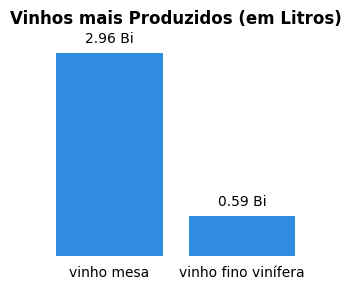

In [91]:
# definindo o tamanho da figura
plt.figure(figsize=(3,3))
# criando o grafico de quantidade de vinhos produzida
ax = sns.barplot(x = quantidade_produzida.index,y = quantidade_produzida.values, color = '#118DFF')
# criando rotulo de dados no grafico 
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f} Bi',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10),
                textcoords='offset points')
# adicionando o titulo no grafico 
grafico_vertical(ax,quantidade_produzida,'Vinhos mais Produzidos (em Litros)')


A produção durante esses 15 anos teve uma média de 230 milhões de litros vendidos por ano, porém
com alguns pontos de instabilidade da produção vinícola.

Isso se deve a muitos fatores externos que podem atrapalhar a produção dos vinhos, como a
instabilidade climática e crises financeiras no país.

In [92]:
# criando uma variavel para analisar a produção de vinhos por ano 
producao_por_ano = producao_vinhos.groupby('Ano')['Total_Produzido'].sum()
# dividindo o valor por milhão para facilitar a vizualização 
producao_por_ano = producao_por_ano / 1_000_000
#criando um dataframe 
producao_por_ano = producao_por_ano.reset_index()
# criando uma coluna com a Média
producao_por_ano['Média'] = producao_por_ano['Total_Produzido'].mean()
# Arredondando os valores
producao_por_ano = producao_por_ano.round(0)


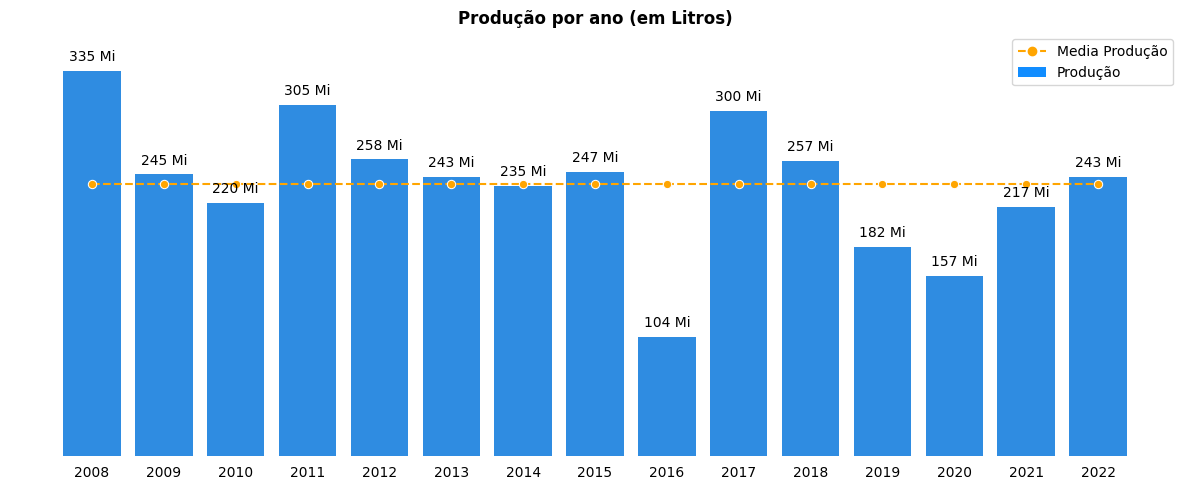

In [93]:

#criando o grafico 1 
plt.figure(figsize=(12,5))
ax = sns.barplot(data = producao_por_ano, x =  'Ano', y = 'Total_Produzido' ,color = '#118DFF' )
# criando rotulo de dados no grafico 
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f} Mi',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10),
                textcoords='offset points')

# criando o grafico 2 
sns.lineplot(data = producao_por_ano, x =  'Ano', y = 'Média' ,color = 'orange', marker = 'o',linestyle = '--')


# Adicionando legendas para cada gráfico
line = plt.Line2D([], [], color='orange', marker='o', linestyle='--', label='Media Produção')
bar = plt.Rectangle((0, 0), 1, 1, fc='#118DFF', edgecolor='none', label='Produção')
plt.legend(handles=[line, bar], loc='upper right')
# chamando nossa função de grafico 
grafico_vertical(ax,producao_por_ano['Total_Produzido'],'Produção por ano (em Litros)')
plt.show()


Em 2016, tanto no Brasil quanto na Europa, houve uma grande instabilidade climática, com uma queda
de 56% na produção. No Rio Grande do Sul, nossa maior fonte de produção de vinho, ocorreu o que
chamam de fenômeno “El Niño” que afetou o clima com chuvas muito intensas e frio excessivo.
Em 2019 ocorreu outra crise climática que afetou muito a produção de vinho, menor do que ocorreu
em 2016, mas ainda assim afetou em 30% a produção produzindo cerca de 182 milhões de litros.
Em 2020 teve uma produção ainda menor mundialmente, pois com a pandemia, praticamente toda a
produção de cultivo, não somentes dos vinhos foi afetada, com aproximadamente 157 milhões de
litros produzidos nacionalmente.

Mas vale o destaque para os anos de 2008, 2011 e 2017 que a produção esteve igual ou superior a 300
milhões de litros produzidos.

Isso se deve a fatores que grandes centros de produções de vinho europeus estavam em crise nesses
anos e o mercado necessitando de vinhos, esses países acabaram importando vinhos brasileiros e
demandou que a nossa produção fosse aumentando para aguentar a demanda.


In [94]:
# calculando a produção entre 2008 e 2015
producao_2008_2015 =  (producao_vinhos.groupby('Ano')['Total_Produzido'].sum()[:8].sum() / 1_000_000_000).round(1)
# calculando a produção entre 2016 e 2022
producao_2016_2022 =  (producao_vinhos.groupby('Ano')['Total_Produzido'].sum()[8:].sum() / 1_000_000_000).round(1)
# criando um dataframe com esse intervalo 
intervalo = {'2008 - 2015': producao_2008_2015, '2016 - 2022': producao_2016_2022} 
df_intervalo = pd.DataFrame(list(intervalo.items()),columns =['Periodo','Valor'])



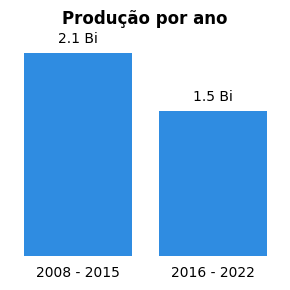

In [95]:
# definindo o tamanho da figura
plt.figure(figsize=(3,3))
# criando o grafico do período
grafico_periodo = sns.barplot(data = df_intervalo , x = 'Periodo', y = 'Valor',color = '#118DFF')
# adicionando o rotulo de dados
for p in grafico_periodo.patches:
    grafico_periodo.annotate(f'{p.get_height():.1f} Bi',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10),
                textcoords='offset points')
# chamando a função que costumiza o gráfico
grafico_vertical(grafico_periodo,df_intervalo['Valor'],'Produção por ano')
# exibindo o gráfico 
plt.show()

Entre 2008 e 2015 a produção teve uma produção de 2,09 bilhoes de litros e uma média de 261
milhões de litros produzidos por ano, sendo uma das melhores fases de produção do Brasil. Contudo
nos 7 anos seguintes 2016 até 2022, a produção teve uma queda de 30% e 1,46 bilhões de litros
produzidos, com médias de 208 milhões de litros produzidos por ano.

In [96]:
estados = {
    'Rio Grande do Sul': 46.97,
    'São Paulo': 8.44,
    'Pernambuco': 8.26,
    'Paraná': 4.00,
    'Bahia': 2.07,
    'Minas Gerais': 1.35,
    'Espírito Santo': 0.20,
    'Paraíba': 0.11,
    'Goiás': 0.11,
    'Distrito Federal': 0.06
}

area = pd.DataFrame(list(estados.items()), columns=['Estado', 'Area'])


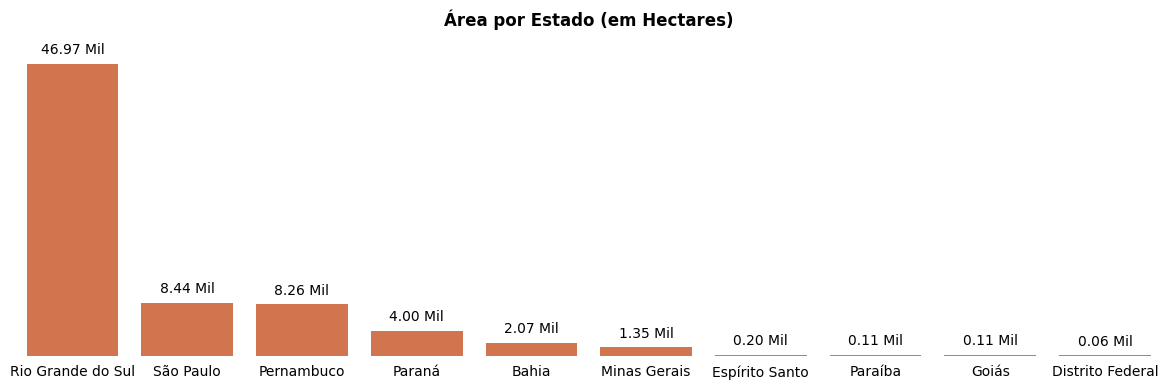

In [97]:
# modificando o tamanho da figura
plt.figure(figsize=(12,4))
# criando o gráfico
grafico_area = sns.barplot(data = area , x = 'Estado' , y = 'Area', color = '#E66C37')
# adicionando o rotulo de dados
for p in grafico_area.patches:
    grafico_area.annotate(f'{p.get_height():.2f} Mil',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10),
                textcoords='offset points')
# chamando a função que costumiza o gráfico
grafico_vertical(grafico_area,area['Area'],'Área por Estado (em Hectares)')
# exibindo o grafico
plt.show()

O Brasil em 2022 possui um total de 75,5 mil hecatres destinados a produção de vinhos.
O Rio Grande do Sul é responsável por 60% desses hectares com um pouco mais de 46 mil hectares
logo em seguida vem São Paulo e Pernambuco com um pouco mais de 8 mil hectares

Essa concentração no Rio Grande do Sul vem de muitos fatores climáticos que ajudam na produção
de vinho.

Para um bom cultivo do vinho é necessário alguns fatores:
- Temperaturas entre 20°C e 25°C
- Solo úmido e aerado
- Altitude entre 300m ate 2000m
- entre outros

### 6.1.2 Comércio de Vinhos no Brasil

In [98]:
comercio_vinhos  = comercio[(comercio['Categoria'] == 'vinho mesa') | (comercio['Categoria'] == 'vinho fino vinífera')]


In [99]:
# calculando o total comercializado de vinhos por tipo
quantidade_comercializada = comercio_vinhos.groupby('Categoria')['Total_Comercializado'].sum()
# ordenando os valores em ordem decrescente
quantidade_comercializada.sort_values(ascending=False,inplace = True)
# dividindo os valores por bilhão para ficar melhor a visualização
quantidade_comercializada = quantidade_comercializada / 1_000_000_000

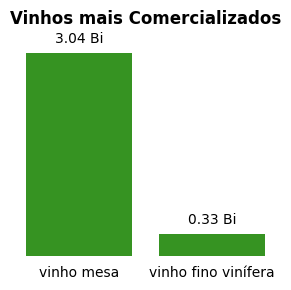

In [100]:
# definindo o tamanho da figura
plt.figure(figsize=(3,3))
# criando o grafico de quantidade de vinhos produzida
ax = sns.barplot(x = quantidade_comercializada.index,y = quantidade_comercializada.values, color = '#2AA60F')
# criando rotulo de dados no grafico 
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f} Bi',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10),
                textcoords='offset points')
# chamando a função de modificar o grafico
grafico_vertical(ax,quantidade_comercializada,'Vinhos mais Comercializados')
plt.show()

Nos últimos 15 anos, a comercialização de vinhos brasileiros chegou a 3,37 bilhões de litros comercializados, tendo uma média de 220 milhões de litros comercializados por ano. Dos 3,37 bilhões de litros comercializados, um pouco mais de 90% vem dos vinhos de mesa, com cerca de 3,04 bilhões de litros comercializado, os outros 10% vem dos vinhos finos que contribuem com cerca de 330 milhões de litros.

In [101]:
# criando uma variavel para analisar a comercialização de vinhos por ano 
comercializacao_por_ano = comercio_vinhos.groupby('Ano')['Total_Comercializado'].sum()
# dividindo o valor por milhão para facilitar a vizualização 
comercializacao_por_ano = comercializacao_por_ano / 1_000_000
#criando um dataframe 
comercializacao_por_ano = comercializacao_por_ano.reset_index()
# criando uma coluna com a Média
comercializacao_por_ano['Média'] = comercializacao_por_ano['Total_Comercializado'].mean()
# Arredondando os valores
comercializacao_por_ano = comercializacao_por_ano.round(0)


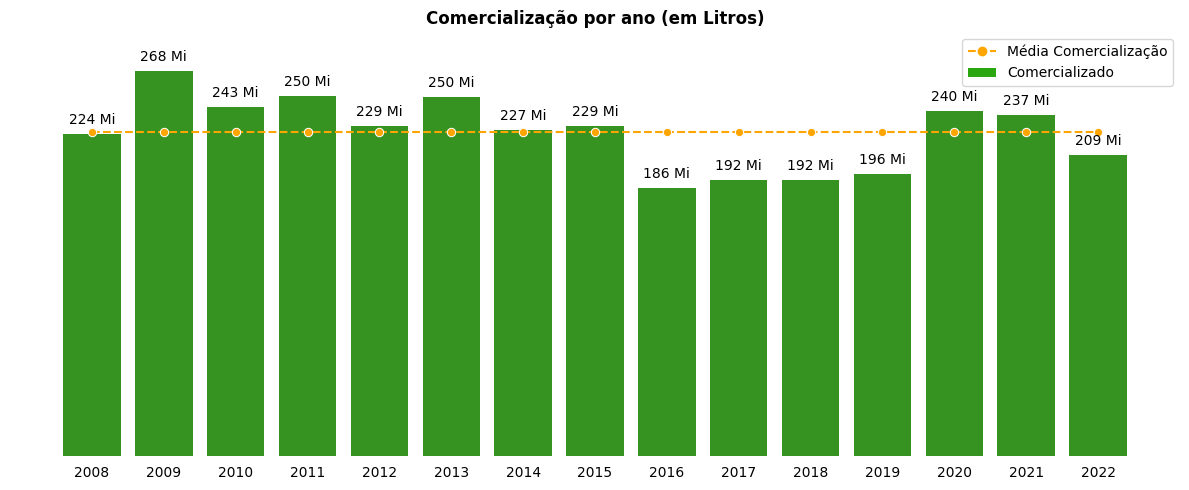

In [102]:

#criando o grafico 1 
plt.figure(figsize=(12,5))
grafico_comercio_ano = sns.barplot(data = comercializacao_por_ano, x =  'Ano', y = 'Total_Comercializado' ,color = '#2AA60F' )
# criando rotulo de dados no grafico 
for p in grafico_comercio_ano.patches:
    grafico_comercio_ano.annotate(f'{p.get_height():.0f} Mi',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10),
                textcoords='offset points')
# criando o grafico 2 
sns.lineplot(data = comercializacao_por_ano, x =  'Ano', y = 'Média' ,color = 'orange', marker = 'o',linestyle = '--')
# Adicionando legendas para cada gráfico
line = plt.Line2D([], [], color='orange', marker='o', linestyle='--', label='Média Comercialização')
bar = plt.Rectangle((0, 0), 1, 1, fc='#2AA60F', edgecolor='none', label='Comercializado')
plt.legend(handles=[line, bar], loc='upper right')
# chamando nossa função de grafico 
grafico_vertical(grafico_comercio_ano,comercializacao_por_ano['Total_Comercializado'],'Comercialização por ano (em Litros)')
plt.show()

A comercialização dos vinhos brasileiros nesses 15 anos tiveram uma média de 220 milhões de litros comercializados por ano, não foram tão instáveis quanto a produção, e nos anos em que não alcançaram a média, os valores foram bem próximo de atingir.

O ano de 2016 foi o pior tanto em quesito de produção como de comercialização e nesse caso impactou bastante não só no ano em que ocorreu como nos anos seguintes. Como citado anteriormente, a mudança climática extrema foi o principal influenciador nessa queda dos vinhos, que além de afetar a produção deles, também afeta a disponibilidade deles no mercado e o aumento do valor dos vinhos em quase 30% no ano de 2016 afetou o seu rendimento até sua normalização em 2020.

Em 2020 que houve o contra ponto entre a produção e comércio, pelo fato da pandemia e a necessitade de ficar em casa, a produção teve uma queda, porém a comercialização teve um aumento de quase 25% relacionada ao ano anterior e isso vem de fatores como a otimização da entrega dos vinhos com o e-commerce, a procura maior das pessoas em entender melhor sobre os vinhos e buscarem experimentar.

In [103]:
# calculando a comercialização entre 2008 e 2015
comercio_2008_2015 =  (comercio_vinhos.groupby('Ano')['Total_Comercializado'].sum()[:8].sum() / 1_000_000_000)
# calculando a comercialização entre 2016 e 2022
comercio_2016_2022 =  (comercio_vinhos.groupby('Ano')['Total_Comercializado'].sum()[8:].sum() / 1_000_000_000)
# criando um dataframe com esse intervalo 
intervalo_comercio = {'2008 - 2015': comercio_2008_2015, '2016 - 2022': comercio_2016_2022} 
df_intervalo_comercio = pd.DataFrame(list(intervalo_comercio.items()),columns =['Periodo','Valor'])


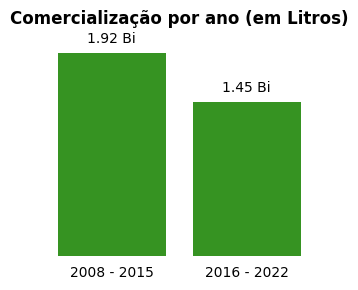

In [104]:
# definindo o tamanho da figura
plt.figure(figsize=(3,3))
# criando o grafico do período
grafico_periodo_comercio = sns.barplot(data = df_intervalo_comercio , x = 'Periodo', y = 'Valor',color = '#2AA60F')
# adicionando o rotulo de dados
for p in grafico_periodo_comercio.patches:
    grafico_periodo_comercio.annotate(f'{p.get_height():.2f} Bi',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10),
                textcoords='offset points')
# chamando a função que costumiza o gráfico
grafico_vertical(grafico_periodo_comercio,df_intervalo_comercio['Valor'],'Comercialização por ano (em Litros)')
# exibindo o gráfico 
plt.show()

Fazendo a mesma comparação feita em produção, o intervalo de 2008 até 2015 de comercialização teve 1,92 bilhões de litros comercializados e uma média de 240 milhões de litros por ano. Já no período de 2016 até 2022 teve 1,45 bilhões de litros comercializados e uma média de 207 milhões de litros, uma queda de um pouco mais de 25%.

## 6.2 Análise dos Dados de Importação e Exportação 

### 6.2.1 Análise dos Dados de Importação 

In [105]:
# Calculando a quantidade total importada
total_importado = importacao_exportacao['Quantidade Importada(Kg)'].sum() / 1_000_000_000
# Calculando o valor total importado
total_importado_valor = importacao_exportacao['Valor Importado(US$)'].sum() / 1_000_000_000
# imprimindo o valor total importado
print(f'Total Importado em Dolares(US$) :{total_importado_valor.round(2)} Bilhões')
# imprimindo a quantidade total importada
print(f'Total Importado em Litros :{total_importado.round(2)} Bilhões')


Total Importado em Dolares(US$) :4.42 Bilhões
Total Importado em Litros :1.42 Bilhões


Durante o período analisado (2008-2022), o Brasil importou 1,42 bilhões de litros de vinho,
gerando um valor comercializado de quase 4,5 bilhões de dólares.


In [106]:
# calculando as importações ao longo dos anos
importacao_anos = importacao_exportacao.groupby('Ano')[['Quantidade Importada(Kg)','Valor Importado(US$)']].sum()
# dividindo tudo por 1 Milhão para facilitar a visualização no grafico 
importacao_anos = importacao_anos / 1_000_000
# Redefinindo o índice para que 'Ano' se torne uma coluna novamente
importacao_anos = importacao_anos.reset_index()


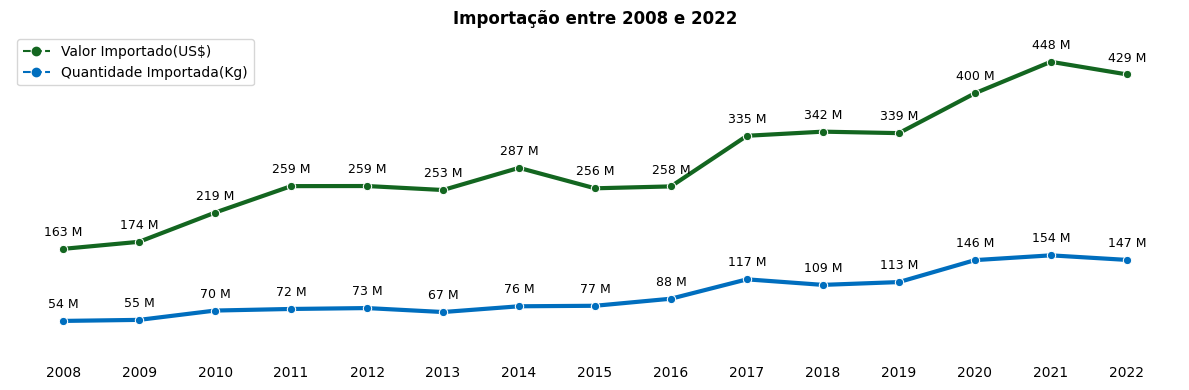

In [107]:
# definindo o tamanho da figura
plt.figure(figsize=(12,4))
# Criando o gráfico de linha de valor de importação por ano
grafico_linha_importacao_valor = sns.lineplot(data=importacao_anos, x='Ano', y='Valor Importado(US$)', marker='o', color='#136620', linewidth=3)  # Ajustando a largura da linha

# Criando rótulo de dados no gráfico de valor
for index, row in importacao_anos.iterrows():
    plt.text(row['Ano'], row['Valor Importado(US$)'] + 15, f'{row["Valor Importado(US$)"]:.0f} M', ha='center', va='bottom', fontsize=9)

# Criando o gráfico de linha de quantidade de importação por ano 
grafico_linha_importacao_quantidade = sns.lineplot(data=importacao_anos, x='Ano', y='Quantidade Importada(Kg)', marker='o', color='#006EBE', linewidth=3) 

# Criando rótulo de dados no gráfico de quantidade
for index, row in importacao_anos.iterrows():
    plt.text(row['Ano'], row['Quantidade Importada(Kg)'] + 15, f'{row["Quantidade Importada(Kg)"]:.0f} M', ha='center', va='bottom', fontsize=9) 

# Adicionando legendas para cada gráfico
line1 = plt.Line2D([], [], color='#136620', marker='o', linestyle='--', label='Valor Importado(US$)')
line2 = plt.Line2D([], [], color='#006EBE', marker='o', linestyle='--', label='Quantidade Importada(Kg)')
plt.legend(handles=[line1, line2], loc='upper left')

grafico_vertical(grafico_linha_importacao_valor,importacao_anos['Valor Importado(US$)'],'Importação entre 2008 e 2022')
plt.show()

A partir do gráfico acima, considerando a importação dos vinhos da série histórica de 2008 a 2022, nota-se que a importação vem **crescendo anualmente**, apesar de que em alguns casos pontuais houve retração. Apesar disso, a evolução da importação nesses 15 anos é crescente, inclusive em alguns momentos críticos como na pandemia da Covid-19 entre os anos de 2020 e 2021 que mesmo com as restrições de deslocamentos, eventos e o mercado retraído em vários setores, o Brasil importou de forma bastante acentuada, saindo de 113M de litros em 2019 para 154M de litros em 2021, um **aumento de 36,3%** em volume de litros comercializados.

Após 3 anos consecutivos de aumento do volume importado, em 2022 houve uma **retração de 4,5%** em comparação ao ano anterior (2021).

In [108]:
# calculando a importacao por país
importacao_por_pais = importacao_exportacao.groupby('País')[['Quantidade Importada(Kg)','Valor Importado(US$)']].sum()
# dividindo por 1 milhão 
importacao_por_pais = (importacao_por_pais / 1_000_000).round(1)
#ordenando por quantidade e criando um dataframe por quantidade dos top 10 países
importacao_por_pais.sort_values(by = 'Quantidade Importada(Kg)',ascending = False,inplace = True)
importacao_por_pais_quantidade = importacao_por_pais.head(10)
#ordenando por valor e criando um dataframe por valor dos top 10 países
importacao_por_pais.sort_values(by = 'Valor Importado(US$)',ascending = False,inplace = True)
importacao_por_pais_valor = importacao_por_pais.head(10)


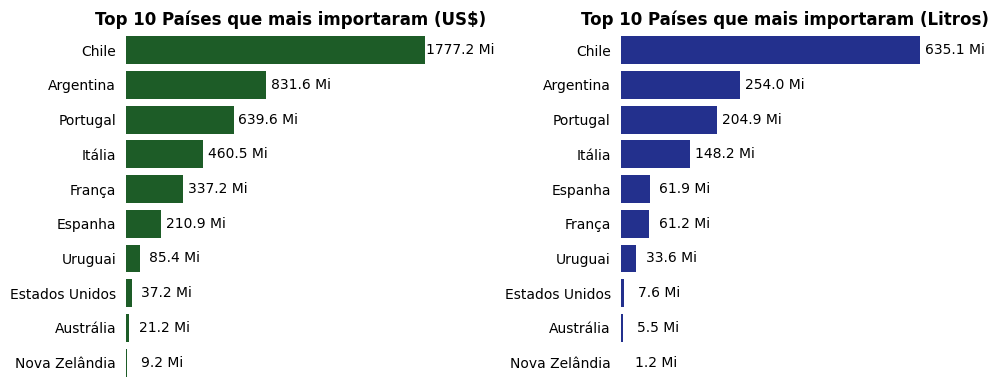

In [109]:
# criando a figura com os dois graficos
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,4))

#criando o grafico de valor importado
ax1 = sns.barplot(data = importacao_por_pais_valor,x ='Valor Importado(US$)',y = 'País',color = '#136620',ax=ax1)
# adicionando o rotulo de dados no grafico de valor importado
for p in ax1.patches:
    width = p.get_width()
    ax1.annotate(f'{width:.1f} Mi',
                 (p.get_x() + width, p.get_y() + p.get_height() / 2),
                 ha='center', va='center', xytext=(25, 0),
                 textcoords='offset points')
# chamando a função de costumização para graficos na horizontal
grafico_horizontal(ax1,importacao_por_pais_valor['Valor Importado(US$)'],'Top 10 Países que mais importaram (US$)')


#criando o grafico de quantidade importada
ax2 = sns.barplot(data = importacao_por_pais_quantidade,x ='Quantidade Importada(Kg)',y = 'País',color = '#12239E',ax=ax2)
# adicionando o rotulo de dados no grafico de quantidade importada
for p in ax2.patches:
    width = p.get_width()
    ax2.annotate(f'{width:.1f} Mi',
                 (p.get_x() + width, p.get_y() + p.get_height() / 2),
                 ha='center', va='center', xytext=(25, 0),
                 textcoords='offset points')
# chamando a função de costumização para graficos na horizontal
grafico_horizontal(ax2,importacao_por_pais_quantidade['Quantidade Importada(Kg)'],'Top 10 Países que mais importaram (Litros)')


Os três principais países que o Brasil mais importou foram Chile, Argentina e Portugal, sendo **Chile a principal fonte de importação de vinhos para o Brasil**, com aproximadamente 2,5 vezes a quantidade vendida para o segundo colocado (Argentina). Representando uma venda de quase 1.8 bilhões de dólares, ou seja, aproximadamente 40% da importação de vinhos brasileiros são importados dos chilenos.

Ponto a se observar relativo a precificação dos produtos: para os países da França e Espanha, nota-se que a importação em quantidade de litros realizada da Espanha (61,9M) é superior ao da França (61,2M), mas em valor, a França (US$ 337,2M) supera a Espanha (US$ 210,9M), uma diferença considerável, mostrando que existe possibilidade de uma melhor arrecadação e posicionamento de preços para os espanhóis. Isso fica claro no gráfico abaixo quando é analisado o valor por litro.


In [110]:
top_importacao_por_pais = importacao_por_pais.head(10)
# criando a coluna de valor do litro importado
top_importacao_por_pais['Valor do Litro Importado (US$)'] = top_importacao_por_pais['Valor Importado(US$)'] / top_importacao_por_pais['Quantidade Importada(Kg)']
# substituindo os valores 'inf' e '-inf' por NaN
top_importacao_por_pais.replace([np.inf, -np.inf], np.nan, inplace=True)
# substituindo os valores NaN por 0
top_importacao_por_pais.fillna(0,inplace=True)
# ordenando os valores de forma decrescente pelo valor do litro
top_importacao_por_pais.sort_values(by='Valor do Litro Importado (US$)',ascending=False,inplace=True)
# criando um dataframe com o Top10 de valor do litro importado
valor_por_litro_importado = top_importacao_por_pais.head(10)

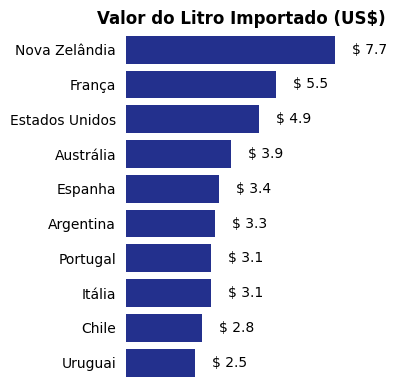

In [111]:
# definindo o tamanho da figura
plt.figure(figsize=(4,4))
# criando o grafico de valor por litro importado
grafico_valor_por_litro_importado = sns.barplot(data = valor_por_litro_importado,x = 'Valor do Litro Importado (US$)',y= 'País',color = '#12239E')
# adicionando o rotulo de dados no grafico de valor por litro
for p in grafico_valor_por_litro_importado.patches:
    width = p.get_width()
    grafico_valor_por_litro_importado.annotate(f'$ {width:.1f}',
                 (p.get_x() + width, p.get_y() + p.get_height() / 2),
                 ha='center', va='center', xytext=(25, 0),
                 textcoords='offset points')
# chamando a função de costumização para graficos na horizontal
grafico_horizontal(grafico_valor_por_litro_importado,valor_por_litro_importado['Valor do Litro Importado (US$)'],'Valor do Litro Importado (US$)')

Quando observado o valor por litro importado em dólares, fica claro que existe uma diferença considerável entre França e Espanha e por conta disso, apesar de importarmos quantidades parecidas, o valor importado da França é bastante superior ao da Espanha.

Destaque para o maior preço por litro que é pago da Nova Zelândia, que fica em 10º no ranking dos maiores importadores de vinhos para o Brasil

Olhando em perspectiva nacional ao longo do tempo, podemos verificar quais são os países que mais apresentaram aumento percentual tanto em quantidade importada quanto em valor importado.

In [112]:
#criando o dataframe de quantidade de importacao por país e por ano
quantidade_importacao = importacao[['País','Ano','Quantidade Importada(Kg)']]
# substituindo os valores NaN por 0
quantidade_importacao.fillna(0,inplace=True)
# abrindo o dataframe por ano com o pivot
quantidade_importacao = quantidade_importacao.pivot(index='País',columns='Ano',values='Quantidade Importada(Kg)')


In [113]:
# calculando a taxa de crescimento anual composta de importacao de vinhos para cada país(CARG Importação)
carg_quantidade_importacao = (quantidade_importacao.iloc[:, -1] / quantidade_importacao.iloc[:, 0]) ** (1 / (quantidade_importacao.shape[1] - 1)) - 1
# substituindo os valores 'inf' e '-inf' por NaN
carg_quantidade_importacao.replace([np.inf, -np.inf], np.nan, inplace=True)
# substituindo os valores NaN por 0
carg_quantidade_importacao.fillna(0,inplace=True)
# ordenando os países com maior CARG Producao
carg_quantidade_importacao = carg_quantidade_importacao.sort_values(ascending=False)
# selecionando os top 10 com maior taxa de crescimento anual composta de importação de vinho 
top10_taxa_de_importacao_quantidade = carg_quantidade_importacao.head(10)
# transformando o valor em porcentagem 
top10_taxa_de_importacao_quantidade = (top10_taxa_de_importacao_quantidade * 100).round(2)
# criando o dataframe
top10_taxa_de_importacao_quantidade = pd.DataFrame(top10_taxa_de_importacao_quantidade, columns=['Taxa de Crescimento anual de Quantidade de Vinho Importada'])

In [114]:
#criando o dataframe de valor de importacao por país e por ano
valor_importacao = importacao[['País','Ano','Valor Importado(US$)']]
# substituindo os valores NaN por 0
valor_importacao.fillna(0,inplace=True)
# abrindo o dataframe por ano com o pivot
valor_importacao = valor_importacao.pivot(index='País',columns='Ano',values='Valor Importado(US$)')

In [115]:
# calculando a taxa de crescimento anual composta de importacao de vinhos para cada país(CARG Importação)
carg_valor_importacao = (valor_importacao.iloc[:, -1] / valor_importacao.iloc[:, 0]) ** (1 / (valor_importacao.shape[1] - 1)) - 1
# substituindo os valores 'inf' e '-inf' por NaN
carg_valor_importacao.replace([np.inf, -np.inf], np.nan, inplace=True)
# substituindo os valores NaN por 0
carg_valor_importacao.fillna(0,inplace=True)
# ordenando os países com maior CARG Producao
carg_valor_importacao = carg_valor_importacao.sort_values(ascending=False)
# selecionando os top 10 com maior taxa de crescimento anual composta de importação de vinho 
top10_taxa_de_importacao_valor = carg_valor_importacao.head(10)
# transformando o valor em porcentagem 
top10_taxa_de_importacao_valor = (top10_taxa_de_importacao_valor * 100).round(2)
# criando o dataframe
top10_taxa_de_importacao_valor = pd.DataFrame(top10_taxa_de_importacao_valor, columns=['Taxa de Crescimento anual de Valor de Vinho Importada'])

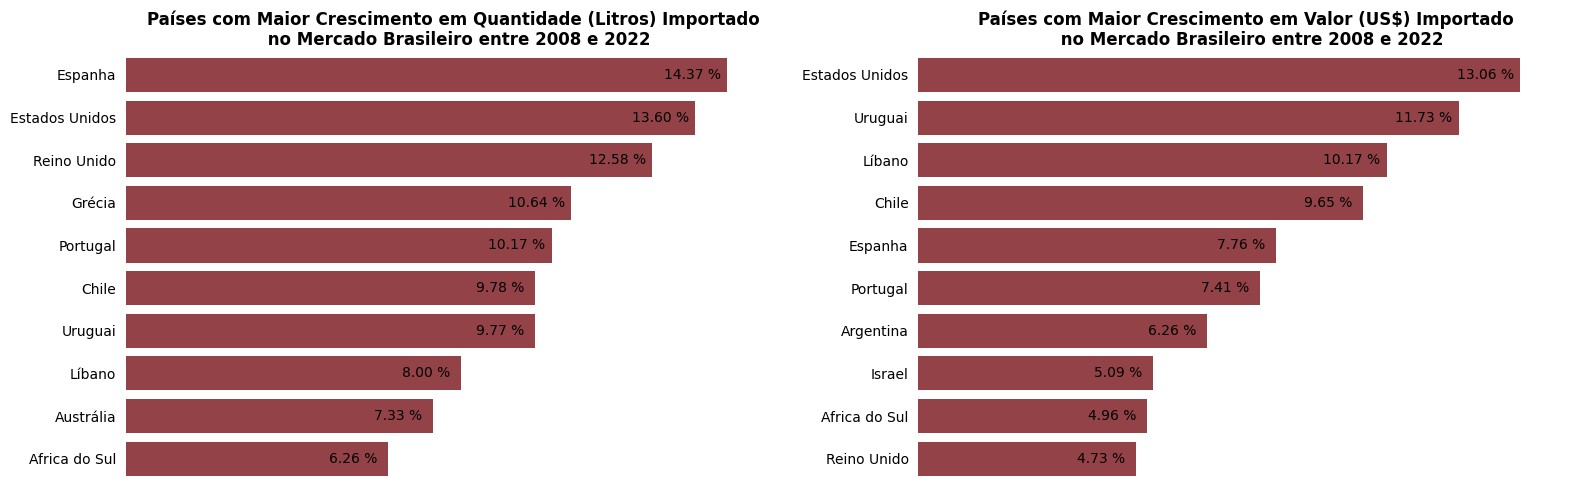

In [116]:
# criando a figura com os dois graficos
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(16,5))

#criando o grafico do top 10 com maior crescimento de importação por quantidade importada
ax1 = sns.barplot(data = top10_taxa_de_importacao_quantidade,x ='Taxa de Crescimento anual de Quantidade de Vinho Importada',y = 'País',color = '#A1343C',ax=ax1)
# adicionando o rotulo de dados no grafico de valor importado
for p in ax1.patches:
    width = p.get_width()
    ax1.annotate(f'{width:.2f} %',
                 (p.get_x() + width, p.get_y() + p.get_height() / 2),
                 ha='center', va='center', xytext=(-25, 0),
                 textcoords='offset points')
# chamando a função de costumização para graficos na horizontal
grafico_horizontal(ax1,top10_taxa_de_importacao_quantidade['Taxa de Crescimento anual de Quantidade de Vinho Importada'],'Países com Maior Crescimento em Quantidade (Litros) Importado \n no Mercado Brasileiro entre 2008 e 2022')


#criando o grafico de quantidade importada
ax2 = sns.barplot(data = top10_taxa_de_importacao_valor,x ='Taxa de Crescimento anual de Valor de Vinho Importada',y = 'País',color = '#A1343C',ax=ax2)
# adicionando o rotulo de dados no grafico de quantidade importada
for p in ax2.patches:
    width = p.get_width()
    ax2.annotate(f'{width:.2f} %',
                 (p.get_x() + width, p.get_y() + p.get_height() / 2),
                 ha='center', va='center', xytext=(-25, 0),
                 textcoords='offset points')
# chamando a função de costumização para graficos na horizontal
grafico_horizontal(ax2,top10_taxa_de_importacao_valor['Taxa de Crescimento anual de Valor de Vinho Importada'],'Países com Maior Crescimento em Valor (US$) Importado \n no Mercado Brasileiro entre 2008 e 2022')

Analisando a importação de vinhos pelo Brasil ao longo do tempo, observamos que os principais países fornecedores que tiveram aumento nesses últimos 15 anos são a Espanha, seguida pelos Estados Unidos e Reino Unido em termos de quantidade importada. No entanto, ao compararmos os valores importados, percebemos uma discrepância interessante.

Embora a Espanha e o Reino Unido tenham liderado em termos de volume importado, o valor por litro de seus vinhos é relativamente baixo em comparação com outros fornecedores. Isso sugere que, apesar do alto volume, os vinhos desses países têm um preço médio mais baixo, refletindo uma preferência do mercado brasileiro por opções mais acessíveis.

Por outro lado, os Estados Unidos não apenas fornecem uma quantidade significativa de vinho para o Brasil, mas também mostram um aumento proporcional no valor importado. Isso indica que os vinhos americanos, apesar de seu preço mais elevado, são valorizados pelo mercado brasileiro, refletindo uma demanda por produtos de alta qualidade e maior valor agregado.

Esses insights podem orientar estratégias de importação para cada mercado. Enquanto os vinhos da Espanha e Reino Unido podem ser promovidos com foco em seu bom custo-benefício e disponibilidade em grande volume, os vinhos dos Estados Unidos podem ser posicionados como produtos premium, destacando sua qualidade e exclusividade.

Dessa forma, compreendendo as preferências e comportamentos do mercado brasileiro em relação aos vinhos importados, é possível ajustar as estratégias de importação para maximizar as oportunidades de crescimento e atender às demandas dos consumidores.





### 6.2.2 Análise dos Dados de Exportação 

In [117]:
exportacao_total_anos = importacao_exportacao.groupby('Ano')[['Quantidade Exportada(Kg)','Valor Exportado(US$)']].sum()
exportacao_total_anos = exportacao_total_anos / 1_000_000
exportacao_total_anos.reset_index(inplace=True)

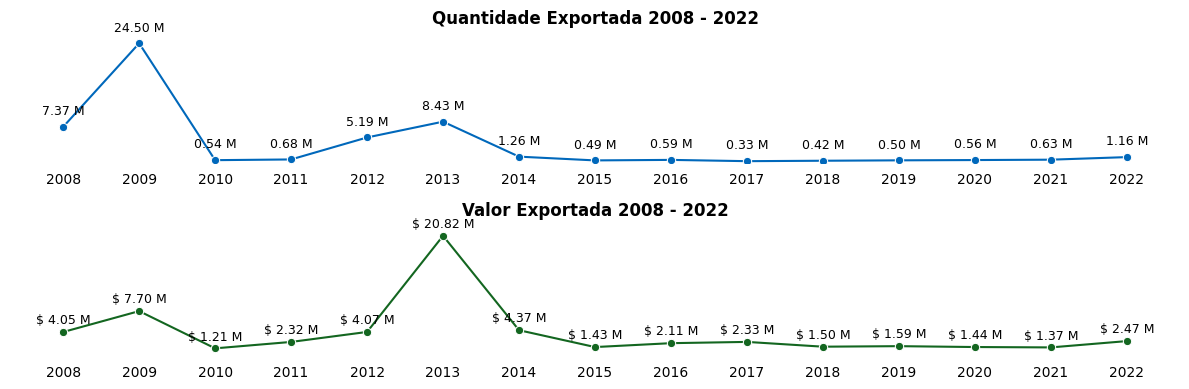

In [118]:
# criando a figura com os dois graficos
fig,(ax1,ax2) = plt.subplots(2,1,figsize=(12,4))
#criando Exportação por quantidade 
grafico_exportacao_linha_quantidade = sns.lineplot(data = exportacao_total_anos, x = 'Ano',y ='Quantidade Exportada(Kg)',ax = ax1,color = '#0068BB',marker = 'o')
# Criando rótulo de dados no gráfico de linha de quantidade
for index, row in exportacao_total_anos.iterrows():
    ax1.text(row['Ano'], row['Quantidade Exportada(Kg)'] + 2, f'{row["Quantidade Exportada(Kg)"]:.2f} M', 
             ha='center', va='bottom', fontsize=9)
# chamando a função de costumização do grafico
grafico_vertical(grafico_exportacao_linha_quantidade,exportacao_total_anos['Quantidade Exportada(Kg)'],'Quantidade Exportada 2008 - 2022')

#criando Exportação por quantidade 
grafico_exportacao_linha_valor = sns.lineplot(data = exportacao_total_anos, x = 'Ano',y ='Valor Exportado(US$)',ax = ax2,color = '#136620',marker = 'o')
# Criando rótulo de dados no gráfico de linha de quantidade
for index, row in exportacao_total_anos.iterrows():
    ax2.text(row['Ano'], row['Valor Exportado(US$)'] + 1, f'$ {row["Valor Exportado(US$)"]:.2f} M', 
             ha='center', va='bottom', fontsize=9)
# chamando a função de costumização do grafico
grafico_vertical(grafico_exportacao_linha_valor,exportacao_total_anos['Valor Exportado(US$)'],'Valor Exportada 2008 - 2022')

Os gráficos acima mostram em numeros a quantidade de litros de vinho exportado e a quantidade de valores arrecadado por ano, desde 2008 o brasil vende mais de 400 mil litros de vinho todo ano, arrecadando em média por ano 5 milhões de dólares pelas vendas, destacasse dois pontos importantes nesta análise, os periodos de 2009 e 2013. Onde temos mudanças interessantes nos resultados.

O ano de 2009 foi marcado por um aumento significativo no volume de vinho exportado pelo Brasil. No entanto, apesar do aumento nas vendas, o faturamento permaneceu abaixo do esperado. Isso pode ser atribuído a uma série de fatores, incluindo a concorrência acirrada no mercado internacional, a desvalorização da moeda brasileira e a falta de estratégias eficazes de posicionamento e marketing. Embora as exportações tenham aumentado em termos de volume, a rentabilidade foi afetada negativamente.

Por outro lado, o ano de 2013 trouxe um cenário diferente. Embora as vendas tenham diminuído em comparação com o ano anterior, o faturamento aumentou significativamente. Esse fenômeno pode ser atribuído a uma série de fatores, incluindo uma estratégia de preços mais assertiva, uma maior ênfase na qualidade em vez da quantidade, e um aumento no consumo de vinho pelo principal importador do vinho brasileiro a Russia, além da valorização da moeda brasileira e uma maior conscientização sobre os vinhos brasileiros em mercados específicos também contribuíram para esse aumento no faturamento.

Analisaremos agora um caso particular de exportação que é **Brasil x Rússia**

In [119]:
# criando o dataframe da exportação apenas da Rússia 
exportacao_russia = importacao_exportacao[importacao_exportacao['País'] == 'Rússia']
# eliminando coluna de importação
exportacao_russia.drop(['Quantidade Importada(Kg)','Valor Importado(US$)'],axis=1,inplace=True)
# dividindo os valores por 1 milhão 
exportacao_russia['Quantidade Exportada(Kg)'] = exportacao_russia['Quantidade Exportada(Kg)'] / 1_000_000
exportacao_russia['Valor Exportado(US$)'] = exportacao_russia['Valor Exportado(US$)'] / 1_000_000

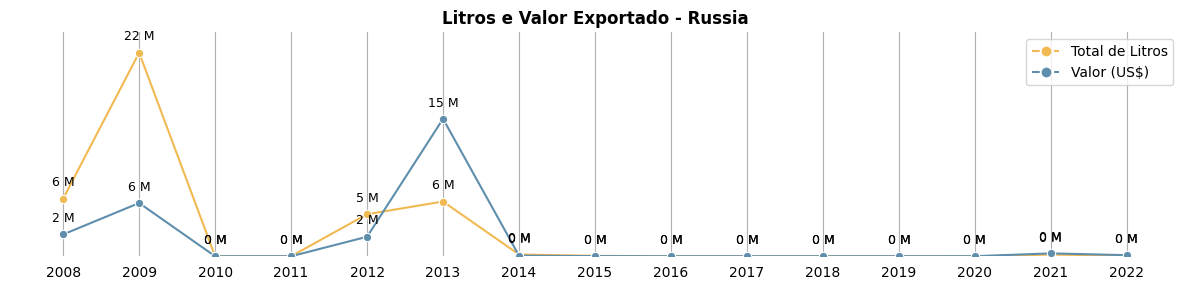

In [120]:
# criando a figura
plt.figure(figsize = (12,3))
# criando o grafico de quantidade
quantidade_russia = sns.lineplot(data = exportacao_russia, x = 'Ano' ,y = 'Quantidade Exportada(Kg)', color= '#F1B951',marker='o')

# Criando rótulo de dados no gráfico de quantidade da Rússia
for index, row in exportacao_russia.iterrows():
    plt.text(row['Ano'], row['Quantidade Exportada(Kg)'] + 1, f'{row["Quantidade Exportada(Kg)"]:.0f} M', ha='center', va='bottom', fontsize=9) 


# criando o grafico de valor
valor_russia = sns.lineplot(data = exportacao_russia, x = 'Ano' ,y = 'Valor Exportado(US$)', color= '#5E8EAC',marker='o')

# Criando rótulo de dados no gráfico de valor da Rússia
for index, row in exportacao_russia.iterrows():
    plt.text(row['Ano'], row['Valor Exportado(US$)'] + 1, f'{row["Valor Exportado(US$)"]:.0f} M', ha='center', va='bottom', fontsize=9)

# Adicionando legendas para cada gráfico
russia_quantidade = plt.Line2D([], [], color='#F1B951', marker='o', linestyle='--', label='Total de Litros')
russia_valor = plt.Line2D([], [], color='#5E8EAC', marker='o', linestyle='--', label='Valor (US$)')
plt.legend(handles=[russia_quantidade, russia_valor], loc='upper right') 
# chamando a função de costumização de grafico
grafico_vertical(quantidade_russia,exportacao_russia['Quantidade Exportada(Kg)'],'Litros e Valor Exportado - Russia')
plt.grid()



As exportações de vinho do Brasil para a Rússia entre 2008 e 2022 passaram por diversas flutuações, refletindo mudanças nas condições econômicas globais, nas relações comerciais entre os dois países e na competitividade dos vinhos brasileiros no mercado russo.

**Crescimento Inicial e pico de vendas (2008-2014)**

A partir de 2008 a Russia se mostrou um forte importador do vinho brasileiro, no periodo destacado houve um crescimento gradual nas exportações de vinho Esse crescimento foi impulsionado por vários fatores:
- Aumento da Produção e Qualidade
- Diversificação de Mercados
- Acordos Comerciais

**Estagnação e Redução nas vendas (2014-2022)**

A partir de 2014, as exportações de vinho brasileiro para a Rússia enfrentaram desafios significativos devido a uma série de fatores:
- Crise Econômica na Rússia: A queda dos preços do petróleo e as sanções internacionais relacionadas à crise na Ucrânia afetaram a economia russa, reduzindo o poder de compra da população.
- Sanções e Contra-Sanções: As sanções econômicas impostas à Rússia e as contra-sanções aplicadas em resposta afetaram as importações de diversos produtos, incluindo vinhos. Isso dificultou o acesso dos vinhos brasileiros ao mercado russo.

In [121]:
# calculando a exportacao por país
exportacao_por_pais = importacao_exportacao.groupby('País')[['Quantidade Exportada(Kg)','Valor Exportado(US$)']].sum()
# dividindo por 1 milhão 
exportacao_por_pais = (exportacao_por_pais / 1_000_000).round(1)
#ordenando por quantidade e criando um dataframe por quantidade dos top 10 países
exportacao_por_pais.sort_values(by = 'Quantidade Exportada(Kg)',ascending = False,inplace = True)
exportacao_por_pais_quantidade = exportacao_por_pais.head(10)
#ordenando por valor e criando um dataframe por valor dos top 10 países
exportacao_por_pais.sort_values(by = 'Valor Exportado(US$)',ascending = False,inplace = True)
exportacao_por_pais_valor = exportacao_por_pais.head(10)

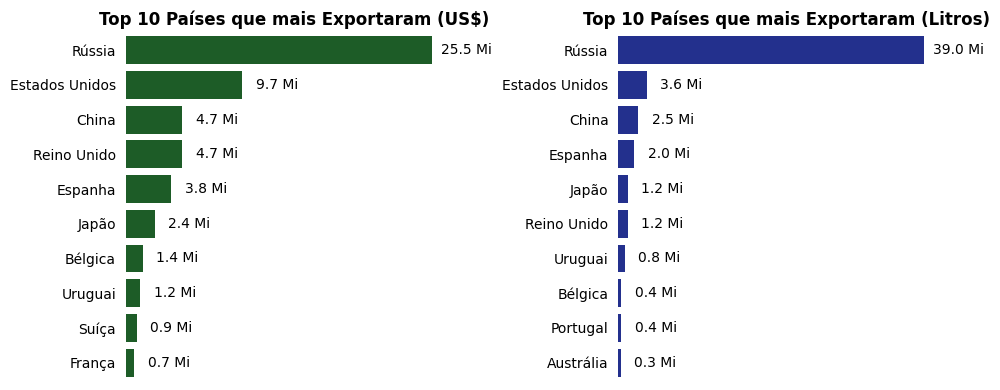

In [122]:
# criando a figura com os dois graficos
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,4))

#criando o grafico de valor exportado
ax1 = sns.barplot(data = exportacao_por_pais_valor,x ='Valor Exportado(US$)',y = 'País',color = '#136620',ax=ax1)
# adicionando o rotulo de dados no grafico de valor exportado
for p in ax1.patches:
    width = p.get_width()
    ax1.annotate(f'{width:.1f} Mi',
                 (p.get_x() + width, p.get_y() + p.get_height() / 2),
                 ha='center', va='center', xytext=(25, 0),
                 textcoords='offset points')
# chamando a função de costumização para graficos na horizontal
grafico_horizontal(ax1,exportacao_por_pais_valor['Valor Exportado(US$)'],'Top 10 Países que mais Exportaram (US$)')


#criando o grafico de quantidade exportada
ax2 = sns.barplot(data = exportacao_por_pais_quantidade,x ='Quantidade Exportada(Kg)',y = 'País',color = '#12239E',ax=ax2)
# adicionando o rotulo de dados no grafico de quantidade exportada
for p in ax2.patches:
    width = p.get_width()
    ax2.annotate(f'{width:.1f} Mi',
                 (p.get_x() + width, p.get_y() + p.get_height() / 2),
                 ha='center', va='center', xytext=(25, 0),
                 textcoords='offset points')
# chamando a função de costumização para graficos na horizontal
grafico_horizontal(ax2,exportacao_por_pais_quantidade['Quantidade Exportada(Kg)'],'Top 10 Países que mais Exportaram (Litros)')

Os três principais países que mais compraram o vinho brasileiro foram Rússia, Estados Unidos e China. Tendo os Rússia como principal comprador disparado.

In [123]:
# calculando a exportacao por país para obter valor por litro
valor_por_litro_exportado = importacao_exportacao.groupby('País')[['Quantidade Exportada(Kg)','Valor Exportado(US$)']].sum()
#ordenando por valor exportado
valor_por_litro_exportado.sort_values(by='Valor Exportado(US$)',ascending=False,inplace=True)
# pegando o top 10 de valor exportado
valor_por_litro_exportado = valor_por_litro_exportado.head(10)
#criando a coluna de valor do litro exportado
valor_por_litro_exportado['Valor do Litro Exportado(US$)'] = valor_por_litro_exportado['Valor Exportado(US$)'] / valor_por_litro_exportado['Quantidade Exportada(Kg)']
# ordenando por valor do litro exportado
valor_por_litro_exportado.sort_values(by='Valor do Litro Exportado(US$)',ascending=False,inplace=True)


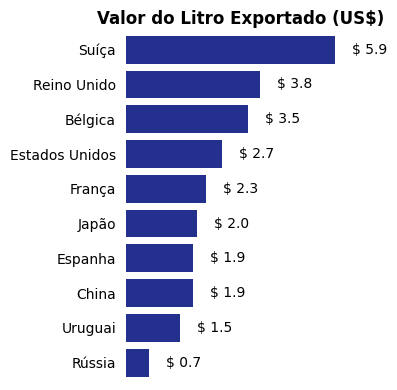

In [124]:
# definindo o tamanho da figura
plt.figure(figsize=(4,4))
# criando o grafico de valor por litro exportado
grafico_valor_por_litro_exportado = sns.barplot(data = valor_por_litro_exportado,x = 'Valor do Litro Exportado(US$)',y= 'País',color = '#12239E')
# adicionando o rotulo de dados no grafico de valor por litro
for p in grafico_valor_por_litro_exportado.patches:
    width = p.get_width()
    grafico_valor_por_litro_exportado.annotate(f'$ {width:.1f}',
                 (p.get_x() + width, p.get_y() + p.get_height() / 2),
                 ha='center', va='center', xytext=(25, 0),
                 textcoords='offset points')
# chamando a função de costumização para graficos na horizontal
grafico_horizontal(grafico_valor_por_litro_exportado,valor_por_litro_exportado['Valor do Litro Exportado(US$)'],'Valor do Litro Exportado (US$)')

É perceptivel a diferença quando comparamos os 3 gráficos apresentados, Apesar de não importar uma quantidade alta em litros, a Suíça, Reino Unido e Bélgica são os paises que melhor pagam pelo litro.

É importante notar tambem a presença de Estados Unidos e Espanha no gráfico ao lado, mesmo comprando quantidades exorbitantes de vinho o valor por litro continua em alta, o que garente para o Brasil uma venda forte e consolidada.

In [125]:
# calculando a variação da quantidade exportada com relaão ao ano anterior
exportacao_total_anos['Variação'] = exportacao_total_anos['Quantidade Exportada(Kg)'].pct_change() * 100
exportacao_total_anos.fillna(0,inplace=True)


In [126]:
# criando a tabela de exportacao
top_exportacao_brasil = exportacao_por_pais
# adicionando a escala de milhar nas colunas 
top_exportacao_brasil['Quantidade Exportada(Kg)'] = top_exportacao_brasil['Quantidade Exportada(Kg)'].apply(lambda x: f'{x :.2f} Mi')
top_exportacao_brasil['Valor Exportado(US$)'] = top_exportacao_brasil['Valor Exportado(US$)'].apply(lambda x: f'{x :.2f} Mi')
#resetando o index 
top_exportacao_brasil.reset_index(inplace=True)
# adicionando a coluna País de Origem
top_exportacao_brasil['País de Origem'] = 'Brasil'
# alterando a ordem das colunas 
top_exportacao_brasil = top_exportacao_brasil.reindex(columns = ['País de Origem','País','Quantidade Exportada(Kg)','Valor Exportado(US$)'])
# renomeando as colunas
top_exportacao_brasil.columns = [['País de Origem','País Destino','Quantidade Exportada(L)','Valor Exportado(US$)']]
top_exportacao_brasil.head(10)


,País de Origem,País Destino,Quantidade Exportada(L),Valor Exportado(US$)
0,Brasil,Rússia,39.00 Mi,25.50 Mi
1,Brasil,Estados Unidos,3.60 Mi,9.70 Mi
2,Brasil,China,2.50 Mi,4.70 Mi
3,Brasil,Reino Unido,1.20 Mi,4.70 Mi
4,Brasil,Espanha,2.00 Mi,3.80 Mi
5,Brasil,Japão,1.20 Mi,2.40 Mi
6,Brasil,Bélgica,0.40 Mi,1.40 Mi
7,Brasil,Uruguai,0.80 Mi,1.20 Mi
8,Brasil,Suíça,0.20 Mi,0.90 Mi
9,Brasil,França,0.30 Mi,0.70 Mi


Com base nas informações disponíveis, é fundamental registrar e visualizar de maneira clara os países para os quais o Brasil mais exportou vinhos nos últimos 15 anos. Uma tabela detalhada seria uma ferramenta essencial para essa análise. Conforme identificado anteriormente, a Rússia lidera as importações em termos de quantidade e valor, seguida pelos Estados Unidos e China.

Esses três países apresentam características comuns que explicam sua posição no topo do ranking de exportação de vinhos brasileiros. Tanto a Rússia, os Estados Unidos quanto a China são nações com grande extensão territorial e população significativa, fatores que impactam diretamente o volume exportado e, consequentemente, o valor dessas exportações. Além disso, esses países são potências econômicas globais, com Produto Interno Bruto (PIB) extremamente elevado em comparação com outras nações, exercendo grande influência no mercado internacional.

Essas características tornam a Rússia, os Estados Unidos e a China mercados prioritários e estratégicos
para as exportações de vinhos do Brasil, indicando não apenas uma demanda robusta, mas também a
capacidade econômica de sustentar altos níveis de importação. Investidores devem considerar esses
aspectos ao analisar o mercado de exportação de vinhos brasileiros, dado o potencial de crescimento e
a estabilidade oferecida por essas economias.



# 7. Prospecção e Conclusão 

Avaliando os países com melhor desempenho em litros de exportação dos últimos 5 anos, chegamos no seguinte resultado:




In [127]:
# criando a lista com os ultimos 5 anos 
lista_anos = ['2018','2019','2020','2021','2022']
# filtrando os ultimos 5 anos 
ultimos_cinco_anos = importacao_exportacao[importacao_exportacao['Ano'].isin(lista_anos)]
# agrupando o valor total dos ultimos 5 anos por país
agrupado_ultimos_cinco_anos = ultimos_cinco_anos.groupby('País')[['Quantidade Exportada(Kg)','Valor Exportado(US$)']].sum()
# ordenando os top 5 países que mais exportaram para o Brasil nos ultimos 5 anos 
agrupado_ultimos_cinco_anos = agrupado_ultimos_cinco_anos.sort_values(by = 'Quantidade Exportada(Kg)',ascending=False).head()
agrupado_ultimos_cinco_anos

,Quantidade Exportada(Kg),Valor Exportado(US$)
País,,
Estados Unidos,1010510,2391033
Uruguai,787782,1195323
China,450219,1534927
Rússia,249440,440094
Japão,190870,477141


In [128]:
#lista dos paises que mais exportaram
lista_de_paises_5_anos = agrupado_ultimos_cinco_anos.index.tolist()
# filtrando apenas os top 5 paises que mais exportaram
top5_ultimos_cinco_anos = importacao_exportacao[importacao_exportacao['País'].isin(lista_de_paises_5_anos)]
# filtrando apenas os ultimos 5 anos
top5_ultimos_cinco_anos = top5_ultimos_cinco_anos[top5_ultimos_cinco_anos['Ano'].isin(lista_anos)]


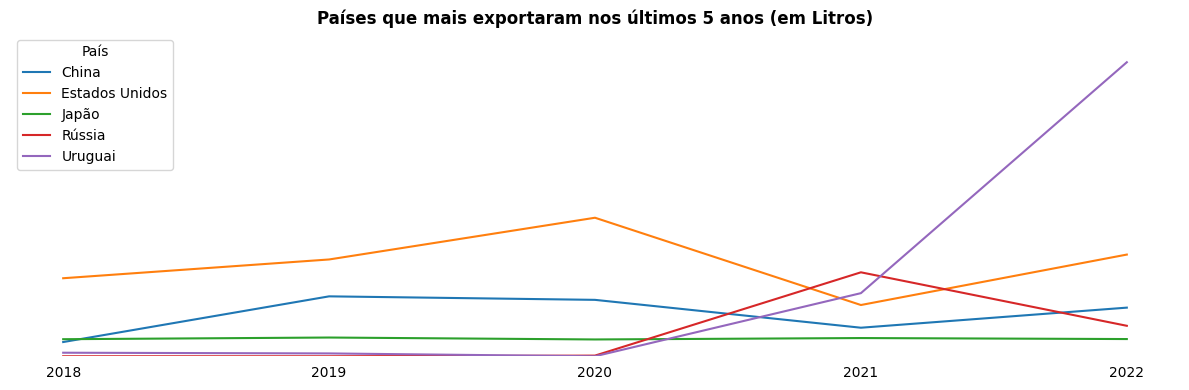

In [129]:
# criando a figura
plt.figure(figsize=(12,4))
# criando o grafico
grafico_ultimos_5_anos = sns.lineplot(data = top5_ultimos_cinco_anos,x = 'Ano',y='Quantidade Exportada(Kg)',hue='País')
# chamando a função de costumização
grafico_vertical(grafico_ultimos_5_anos,top5_ultimos_cinco_anos['Quantidade Exportada(Kg)'],'Países que mais exportaram nos últimos 5 anos (em Litros)')


Com uma análise de mercado referente à exportação de vinhos do Brasil para Rússia, China, Estados Unidos, Japão e Uruguai, além de trazer medidas para melhorar o relacionamento comercial e aumentar o número de vinhos exportados para cada país.

A Rússia é um mercado em crescimento para vinhos brasileiros, com potencial devido ao aumento do consumo de vinhos no país. Porém com a guerra envolvendo a Ucrânia, devemos considerar alguns pontos:
- Instabilidade Econômica 
- Sanções Internacionais e Barreiras Logísticas
- Aumento dos Custos de Transporte e Logística 
- Mudanças nas Políticas Comerciais 
- Nacionalismo Econômico

Esses fatores combinados podem levar a uma diminuição significativa no volume de exportação de vinhos do Brasil para a Rússia, afetando tanto os produtores quanto os exportadores brasileiros.
- Medidas de melhorias:
   - Participação em feiras e eventos de vinhos na Rússia para aumentar a visibilidade dos
produtos brasileiros.
   - Negociação de acordos comerciais bilaterais para reduzir tarifas e facilitar o acesso ao
mercado russo.

A China é um dos mercados de importação de vinho de mais rápido crescimento no mundo, com uma demanda crescente impulsionada pelo aumento do poder de compra e pelo interesse crescente dos consumidores chineses em vinhos estrangeiros. Como maior país do mundo em população, a China representa um mercado enorme e estratégico para os produtores de vinho de todo o mundo. Melhorar o relacionamento comercial com a China é crucial para os produtores de vinho brasileiros, pois isso pode abrir oportunidades significativas de exportação.

- Medidas de melhorias:
   - Investimento em marketing e promoção de vinhos brasileiros na China para aumentar a visibilidade da marca.
   - Estabelecimento de parcerias estratégicas com importadores e distribuidores chineses para ampliar a distribuição dos vinhos brasileiros.


O Estados Unidos é reconhecido como um dos maiores mercados consumidores de vinhos do mundo, os Estados Unidos oferecem uma oportunidade ímpar de crescimento. A diversidade e o poder de compra dos consumidores americanos, aliados à estabilidade econômica e à robustez do setor vinícola nos EUA, tornam esse mercado extremamente atrativo.

- Medidas de melhorias:
    - Participação em eventos de vinhos nos Estados Unidos para estabelecer contatos comerciais e promover os produtos brasileiros.
    - Investimento em certificações de qualidade e sustentabilidade para aumentar a confiança dos consumidores americanos nos vinhos brasileiros.

O Japão é um mercado sofisticado e exigente para vinhos, com uma cultura crescente de apreciação de vinhos de alta qualidade.

- Medidas de melhorias:
    - Promoção de vinhos brasileiros em eventos e degustações no Japão para educar os consumidores sobre a diversidade e qualidade dos produtos brasileiros.
    - Colaboração com importadores e distribuidores japoneses para adaptar os vinhos brasileiros às preferências locais e expandir a presença no mercado.

O Uruguai é um mercado próximo e estratégico para os vinhos brasileiros, com potencial devido à proximidade geográfica e cultural, o país apresentou um grande crescimento em 2021 e 2022. O Brasil e o Uruguai, como membros do Mercosul (Mercado Comum do Sul), beneficiam-se de acordos que promovem o livre comércio entre os países membros.

- Medidas de melhorias:
    - Fortalecimento de parcerias comerciais entre produtores e distribuidores brasileiros e uruguaios para facilitar o comércio e a distribuição de vinhos.
    - Realização de campanhas de marketing conjunto para promover os vinhos brasileiros no mercado uruguaio e aumentar a conscientização entre os consumidores.
    - Utilização das vantagens logísticas proporcionadas pela proximidade geográfica e pelas facilidades comerciais do Mercosul para reduzir custos de transporte e otimizar a distribuição dos vinhos no Uruguai.

Ao tirar proveito dos acordos e benefícios proporcionados pelo Mercosul, o Brasil pode continuar a
expandir e fortalecer suas exportações de vinhos para o Uruguai, promovendo uma cooperação
comercial benéfica para ambos os países.

#### Modelo Matemático 


Para fornecer os melhores insights de exportação aos nossos investidores, utilizamos bases de dados externas do mercado global de vinhos, fornecidas pela International Organisation of Vine and Wine (OIV). Nesta análise, desenvolvemos um modelo matemático robusto que, a partir de diversos indicadores, gera uma pontuação que identifica os mercados de vinho mais promissores. Esse modelo permite avaliar e priorizar mercados estratégicos para novas iniciativas de exportação, baseando-se em dados concretos e tendências de mercado.

Inicialmente, extraímos da base de dados as informações de consumo, importação e produção de vinhos de todos os países do mundo no período de 2008 a 2022. Com essas informações, somamos o total para cada país nesse período, resultando em três indicadores principais: 'Consumo Total 15 anos (L)', 'Importação Total 15 anos (L)' e 'Produção Total 15 anos (L)'. Esses indicadores são relevantes porque fornecem uma visão global do mercado de vinho em cada país, abrangendo o que cada país produz, importa e consome.

Para o cenário de estratégia de exportação brasileira, consideramos que quanto maior o consumo e a importação, melhor será o país para investir. Por outro lado, quanto maior a produção interna, menos atraente será o mercado, pois nossos vinhos teriam que competir com a produção local, que geralmente possui menos impostos. Portanto, utilizamos um critério de decrescimento para a produção interna.

Outro fator relevante para o modelo é o consumo per capita médio anual em litros, 'Consumo Per Capita Médio por Ano (L)'. Esse indicador revela o consumo médio por habitante, ajustando a análise para não ser enviesada pelo volume total, que pode ser grande devido à alta população. Este indicador foi calculado a partir da média do 'Consumo Total 15 anos (L)' dividido pela população de cada país, com dados populacionais obtidos de uma base de dados do Wikipedia contendo os censos mais recentes de cada país.

Consideramos a 'Cotação em Real' de cada país. Esse indicador permite analisar a força da moeda brasileira em relação às outras moedas. Um Real menos valorizado em comparação à moeda local oferece uma vantagem competitiva, pois os produtos brasileiros se tornam mais baratos para os importadores estrangeiros, aumentando nossa receita ao negociar em uma moeda mais valorizada.

Todo esse processo foi feito ainda no tratamento dos dados do Mercado Global de Vinho na seção 5.3


In [130]:
# Visualizando a a base externa de vinho tratada
dados_externos.head()

,País,Consumo Total 15 anos(L),Importação Total 15 anos(L),Produção Total 15 anos(L),Cotação em Real,Consumo Per Capita Média por ano(L)
0,Alemanha,3.010620e+10,2.226990e+10,1.314530e+10,5.460,23.955426
1,Reino Unido,1.951400e+10,1.977290e+10,6.980000e+07,6.450,18.716925
2,Estados Unidos,4.649480e+10,1.691680e+10,3.479240e+10,5.170,9.116973
3,França,4.091480e+10,9.762800e+09,6.657170e+10,5.460,41.788059
4,Rússia,1.504420e+10,6.605900e+09,7.741200e+09,0.065,6.862873


Outra informação valiosa retirada dessa base de dados são as taxas de crescimento anual desses três aspectos: 'Taxa de Crescimento do Consumo', 'Taxa de Crescimento da Importação' e 'Taxa de Decrescimento da Produção'. Esses cálculos foram realizados utilizando a fórmula CAGR (Compounded Annual Growth Rate) ou Taxa de Crescimento Anual Composto, que mede o crescimento de um indicador ao longo dos anos. Com essas informações, podemos avaliar se o mercado de um país está aquecendo ou diminuindo nos últimos 15 anos. Para importação e consumo, uma taxa CAGR maior é desejável, indicando um aumento no consumo e importação de vinhos, o que é ideal para nossos investimentos. Em contraste, um crescimento na produção interna pode sinalizar um mercado menos receptivo a novos vinhos estrangeiros.

O calculo dessas taxas estão apresentados a seguir:

In [131]:
# extraindo apenas o consumo dos top 40 países que mais importaram vinhos
mercado_consumo = mercado_top40[mercado_top40['Categoria'] == 'Consumo']
# abrindo por ano a base de consumo 
mercado_consumo = mercado_consumo.pivot(index = 'País',columns='Ano',values='Quantidade(L)')
# calculando a taxa de crescimento anual composta de consumo de vinhos para cada país(CARG Consumo)
carg_consumo = (mercado_consumo.iloc[:, -1] / mercado_consumo.iloc[:, 0]) ** (1 / (mercado_consumo.shape[1] - 1)) - 1
# ordenando os países com maior CARG CONSUMO
carg_consumo = carg_consumo.sort_values(ascending=False)
# consumo
carg_consumo = carg_consumo.reset_index()
carg_consumo.columns = ['País', 'Taxa de Crescimento Consumo']


In [132]:
# extraindo apenas a produção dos top 40 países que mais importaram vinhos
mercado_producao = mercado_top40[mercado_top40['Categoria'] == 'Produção']
# substituindo os valores NaN por 0 
mercado_producao.fillna(0,inplace = True)
# abrindo por ano a base de producao
mercado_producao = mercado_producao.pivot(index = 'País',columns='Ano',values='Quantidade(L)')
# calculando a taxa de crescimento anual composta de produção de vinhos para cada país(CARG Consumo)
carg_producao = (mercado_producao.iloc[:, -1] / mercado_producao.iloc[:, 0]) ** (1 / (mercado_producao.shape[1] - 1)) - 1
# ordenando os países com menor CARG Producao
carg_producao = carg_producao.sort_values(ascending=True)
# substituindo os valores 'inf' e '-inf' por NaN
carg_producao.replace([np.inf, -np.inf], np.nan, inplace=True)
# substituindo os valores NaN por 0 
carg_producao.fillna(0,inplace = True)
# producao
carg_producao = carg_producao.reset_index()
carg_producao.columns = ['País', 'Taxa de Crescimento Produção']

In [133]:
# extraindo apenas a importaram dos top 40 países que mais importaram vinhos
mercado_importacao = mercado_top40[mercado_top40['Categoria'] == 'Importação']
# substituindo os valores NaN por 0 
mercado_importacao.fillna(0,inplace = True)
# abrindo por ano a base de importacao
mercado_importacao = mercado_importacao.pivot(index = 'País',columns='Ano',values='Quantidade(L)')
# calculando a taxa de crescimento anual composta de importacao de vinhos para cada país(CARG Consumo)
carg_importacao = (mercado_importacao.iloc[:, -1] / mercado_importacao.iloc[:, 0]) ** (1 / (mercado_importacao.shape[1] - 1)) - 1
# ordenando os países com maior CARG Importacao
carg_importacao = carg_importacao.sort_values(ascending=False)
# substituindo os valores 'inf' e '-inf' por NaN
carg_importacao.replace([np.inf, -np.inf], np.nan, inplace=True)
# substituindo os valores NaN por 0 
carg_importacao.fillna(0,inplace = True)
# importacao
carg_importacao = carg_importacao.reset_index()
carg_importacao.columns = ['País', 'Taxa de Crescimento Importação']

In [134]:
# unindo o dataframe com o carg consumo com carg producao
df1 = pd.merge(carg_consumo,carg_producao,on='País')
# unindo o dataframe com o carg consumo, carg producao com o dataframe carg_importação
df2 = pd.merge(df1,carg_importacao,on='País')
# unindo o dataframe com os cargs com a base_externa que contem as demais informações
dados_externos = pd.merge(df2,dados_externos,on='País')


In [135]:
# utilizando o Scikit-Learn para normalizar todas as colunas
scaler = MinMaxScaler()
cols_to_normalizadas = ['Taxa de Crescimento Consumo', 'Taxa de Crescimento Produção',
                        'Taxa de Crescimento Importação', 'Consumo Total 15 anos(L)',
                        'Importação Total 15 anos(L)', 'Produção Total 15 anos(L)',
                        'Cotação em Real', 'Consumo Per Capita Média por ano(L)']
dados_externos[cols_to_normalizadas] = scaler.fit_transform(dados_externos[cols_to_normalizadas])

In [136]:
# como o objetivo é inversamente proporcional a taxa de crescimento da produção e produção total iremos usar o complento em relação a 1 pos normalização
dados_externos['Taxa de Crescimento Produção'] = 1 - dados_externos['Taxa de Crescimento Produção']
dados_externos['Produção Total 15 anos(L)'] = 1 - dados_externos['Produção Total 15 anos(L)']

In [137]:
dados_externos.columns = ['País', 'Taxa de Crescimento Consumo', 'Taxa de Decrescimento Produção',
                            'Taxa de Crescimento Importação', 'Consumo Total 15 anos(L)',
                            'Importação Total 15 anos(L)', 'Produção Total 15 anos(L)',
                            'Cotação em Real', 'Consumo Per Capita Média por ano(L)']

In [138]:
# atribuindo peso as colunas
peso_consumo = 0.1
peso_importacao = 0.1
peso_producao = 0.05
peso_per_capita = 0.05
peso_cotacao = 0.1
peso_consumo_total = 0.2
peso_importacao_total = 0.2
peso_producao_total = 0.2

In [139]:
# calculando a pontuação composta segundo nosso modelo matemático
dados_externos['Pontuacao_Composta'] = (
    dados_externos['Taxa de Crescimento Consumo'] * peso_consumo +
    dados_externos['Taxa de Crescimento Importação'] * peso_importacao +
    dados_externos['Taxa de Decrescimento Produção'] * peso_producao +
    dados_externos['Consumo Per Capita Média por ano(L)'] * peso_per_capita +
    dados_externos['Cotação em Real'] * peso_cotacao +
    dados_externos['Consumo Total 15 anos(L)'] * peso_consumo_total +
    dados_externos['Importação Total 15 anos(L)'] * peso_importacao_total +
    dados_externos['Produção Total 15 anos(L)'] * peso_producao_total
)
# Ordenando os países com base na pontuação composta
dados_externos.sort_values(by='Pontuacao_Composta', ascending=False, inplace=True)

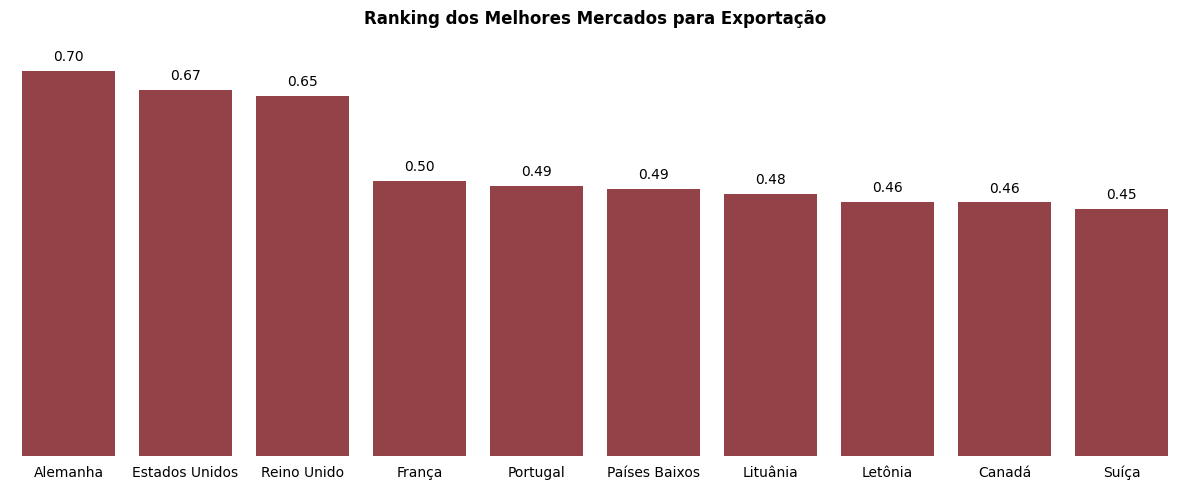

In [140]:
# extraindo o top 10 melhores países para investir segundo o modelo matemático 
top_10_modelo = dados_externos.head(10)
#criando a figura
plt.figure(figsize=(12,5))
#criando o grafico 
grafico_modelo_matematico = sns.barplot(data = top_10_modelo, x = 'País',y = 'Pontuacao_Composta',color = '#A1343C')
# adicinando o rotulo de dados
for p in grafico_modelo_matematico.patches:
    grafico_modelo_matematico.annotate(f'{p.get_height():.2f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10),
                textcoords='offset points')
# chamando a função de costumização 
grafico_vertical(grafico_modelo_matematico,top_10_modelo['Pontuacao_Composta'],'Ranking dos Melhores Mercados para Exportação')

A partir do gráfico, podemos observar que a Alemanha apresenta a melhor pontuação de mercado, indicando ser o melhor mercado para investir conforme nosso modelo. Isso se deve ao fato de a Alemanha ter sido o maior importador de vinhos do mundo nos últimos 15 anos, possuir uma produção relativamente baixa em comparação com outros países, ter uma moeda forte (Euro) em relação ao Real e um consumo per capita alto. Esses fatores fazem da Alemanha um excelente mercado para possíveis campanhas de marketing, participação em feiras e negociações com importadoras locais alemãs.

Logo em seguida, e não tão distante em pontuação, vem os Estados Unidos da América. O grande atrativo dos EUA é o seu vasto mercado consumidor. O país apresentou o maior consumo de vinhos do mundo nos últimos 15 anos, um decréscimo na produção e um aumento na importação, indicando que o mercado está aberto a vinhos estrangeiros. Além disso, a moeda valorizada frente ao Real e o alto volume de importação nos últimos 15 anos reforçam seu potencial como mercado de exportação.

Fechando o Top 3 de melhores mercados, temos o Reino Unido, com uma pontuação bem próxima à dos Estados Unidos. O Reino Unido se destaca por ter a moeda mais valorizada em relação ao Real, baixa produção de vinhos, alta importação e um consumo de vinho que está dentro da média global nos últimos 15 anos. Esses fatores fazem do Reino Unido um mercado atrativo para exportação de vinhos.

Para melhorar as exportações de vinhos para esses mercados, várias estratégias específicas foram desenvolvidas. Para a Alemanha, é crucial participar de feiras como a ProWein, desenvolver campanhas de marketing específicas, estabelecer parcerias estratégicas com importadores locais, realizar degustações e promoções em pontos de venda, e organizar eventos educativos sobre os vinhos brasileiros. Nos Estados Unidos, o foco deve ser em campanhas de marketing digital, distribuição estratégica por estado, obtenção de certificações de qualidade, organização de eventos exclusivos em restaurantes renomados, e expansão das vendas online. No Reino Unido, a ênfase deve estar na colaboração com importadores e distribuidores, marketing e promoções localizadas, eventos de degustação e educação, promoção do enoturismo brasileiro, implementação de programas de fidelidade, e alianças com redes de supermercados e lojas especializadas.

Além dessas estratégias específicas, há abordagens comuns a todos os mercados. Ajustar a estrutura de preços para garantir competitividade, fortalecer a marca dos vinhos brasileiros através de storytelling, buscar apoio e subsídios governamentais para promover exportações, e coletar feedback dos consumidores para adaptar os produtos conforme necessário são passos essenciais para melhorar a presença e competitividade dos vinhos brasileiros nos mercados internacionais.